# Extra EDA + Baseline by CatBoost

# 1. Merging and Preprocessing

In [2]:
!mkdir data
!mkdir data/history

!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1H72j0zoxJKt4vW_h9oYETMmLb7SPREeC&export=download&authuser=1&confirm=t' -O './data/getmatch_data.csv'
!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1FfuPDa09XYwfPGWNDXpyqMoOGlDHsiGi&export=download&authuser=1&confirm=t' -O './data/hh_data.csv'

mkdir: data: File exists
--2024-12-17 10:53:05--  https://drive.usercontent.google.com/download?id=1H72j0zoxJKt4vW_h9oYETMmLb7SPREeC&export=download&authuser=1&confirm=t
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.21.161
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.21.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6647901 (6,3M) [application/octet-stream]
Saving to: ‘./data/getmatch_data.csv’

./data/getmatch_dat 100%[===================>]   6,34M  18,5MB/s    in 0,3s    

2024-12-17 10:53:10 (18,5 MB/s) - ‘./data/getmatch_data.csv’ saved [6647901/6647901]

--2024-12-17 10:53:10--  https://drive.usercontent.google.com/download?id=1FfuPDa09XYwfPGWNDXpyqMoOGlDHsiGi&export=download&authuser=1&confirm=t
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.21.161
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.21.161|:443... c

In [3]:
import pandas as pd

In [4]:
getmatch = pd.read_csv('./data/getmatch_data.csv')
hh = pd.read_csv('./data/hh_data.csv')

## Getmatch

In [5]:
getmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1367 non-null   int64  
 1   url               1367 non-null   object 
 2   title             1367 non-null   object 
 3   company_name      1364 non-null   object 
 4   salary_text       1364 non-null   object 
 5   salary_from       1317 non-null   float64
 6   salary_to         762 non-null    float64
 7   location          1081 non-null   object 
 8   work_format       1363 non-null   object 
 9   specialization    1363 non-null   object 
 10  level             1363 non-null   object 
 11  company_logo_url  0 non-null      float64
 12  description_text  1364 non-null   object 
 13  skills            1367 non-null   object 
 14  posted_date       0 non-null      float64
dtypes: float64(4), int64(1), object(10)
memory usage: 160.3+ KB


drop an extra index column

In [6]:
getmatch = getmatch.drop(columns=['Unnamed: 0'])

Create a source and currency columns

In [7]:
getmatch['source'] = 'getmatch'

In [8]:
def get_currency(x):
    X = str(x).upper()
    if any(currency in X for currency in ['€', 'EUR']):
        return 'EUR'
    elif any(currency in X for currency in ['£', 'GBP']):
        return 'GBP'
    elif any(currency in X for currency in ['$', 'USD']):
        return 'USD'
    elif any(currency in X for currency in ['₽', 'RUB', 'RUR']):
        return 'RUR'
    else:
        return None
    
getmatch['currency'] = getmatch['salary_text'].apply(get_currency)

In [9]:
getmatch.head()

,url,title,company_name,salary_text,salary_from,salary_to,location,work_format,specialization,level,company_logo_url,description_text,skills,posted_date,source,currency
0,https://getmatch.ru/vacancies/23672-produktovy...,Продуктовый аналитик (Путешествия),Т-Банк,от 220 000 ₽/мес на руки,220000.0,NaN,Москва (м. Белорусская),Можно удалённо из РФ,Product Analyst,Middle,NaN,Путешествия — онлайн-тревел-агентство в экосис...,['SQL'],NaN,getmatch,RUR
1,https://getmatch.ru/vacancies/23671-produktovy...,Продуктовый аналитик (Образование),Яндекс (HR Tech),250 000 —‍ 300 000 ₽/мес на руки,250000.0,300000.0,Москва (м. Парк культуры),Офис или гибрид,Product Analyst,Middle,NaN,Технологии и команда экспертов мирового уровня...,"['Python', 'SQL']",NaN,getmatch,RUR
2,https://getmatch.ru/vacancies/22371-team-lead-...,Team Lead (Golang),Selectel,400 000 —‍ 500 000 ₽/мес на руки,400000.0,500000.0,Москва (м. Октябрьское поле),Можно удалённо из РФ,Golang,Lead,NaN,Selectel в поиске Тимлида в команду разработки...,"['Go', 'Puppet', 'Ansible', 'Terraform', 'Ceph...",NaN,getmatch,RUR
3,https://getmatch.ru/vacancies/23666-spetsialis...,Специалист технической поддержки финансовых ре...,Яндекс (HR Tech),150 000 —‍ 190 000 ₽/мес на руки,150000.0,190000.0,Москва (м. Парк культуры),Офис или гибрид,DevOps,Middle,NaN,"Добрый день! Я Евгений Беляев, руководитель сл...","['SQL', 'PL/SQL']",NaN,getmatch,RUR
4,https://getmatch.ru/vacancies/23665-spetsialis...,Специалист технической поддержки (Биллинг),Яндекс (HR Tech),150 000 —‍ 190 000 ₽/мес на руки,150000.0,190000.0,Москва (м. Парк культуры),Офис или гибрид,DevOps,Middle,NaN,"Привет! Меня зовут Костя Климук, и я руковожу ...","['SQL', 'Oracle']",NaN,getmatch,RUR


In [10]:
getmatch_short = getmatch[[
'title', 
'location',
'company_name',
'skills',
'level',
'description_text',
'salary_from',
'salary_to', 
'currency',
'source',
'url',
]].rename(columns={
'description_text': 'description',
'company_name': 'company',
'level': 'grade',
})

getmatch_short.head()

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url
0,Продуктовый аналитик (Путешествия),Москва (м. Белорусская),Т-Банк,['SQL'],Middle,Путешествия — онлайн-тревел-агентство в экосис...,220000.0,NaN,RUR,getmatch,https://getmatch.ru/vacancies/23672-produktovy...
1,Продуктовый аналитик (Образование),Москва (м. Парк культуры),Яндекс (HR Tech),"['Python', 'SQL']",Middle,Технологии и команда экспертов мирового уровня...,250000.0,300000.0,RUR,getmatch,https://getmatch.ru/vacancies/23671-produktovy...
2,Team Lead (Golang),Москва (м. Октябрьское поле),Selectel,"['Go', 'Puppet', 'Ansible', 'Terraform', 'Ceph...",Lead,Selectel в поиске Тимлида в команду разработки...,400000.0,500000.0,RUR,getmatch,https://getmatch.ru/vacancies/22371-team-lead-...
3,Специалист технической поддержки финансовых ре...,Москва (м. Парк культуры),Яндекс (HR Tech),"['SQL', 'PL/SQL']",Middle,"Добрый день! Я Евгений Беляев, руководитель сл...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23666-spetsialis...
4,Специалист технической поддержки (Биллинг),Москва (м. Парк культуры),Яндекс (HR Tech),"['SQL', 'Oracle']",Middle,"Привет! Меня зовут Костя Климук, и я руковожу ...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23665-spetsialis...


for skills, transform from lists like ['Python', 'SQL'] to strings like 'Python, SQL'

In [11]:
def list_to_string(x):
    try:
        x = eval(x)
        return ', '.join(x)
    except:
        return x
    

getmatch_short['skills'] = getmatch_short['skills'].apply(list_to_string)
getmatch_short.head()

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url
0,Продуктовый аналитик (Путешествия),Москва (м. Белорусская),Т-Банк,SQL,Middle,Путешествия — онлайн-тревел-агентство в экосис...,220000.0,NaN,RUR,getmatch,https://getmatch.ru/vacancies/23672-produktovy...
1,Продуктовый аналитик (Образование),Москва (м. Парк культуры),Яндекс (HR Tech),"Python, SQL",Middle,Технологии и команда экспертов мирового уровня...,250000.0,300000.0,RUR,getmatch,https://getmatch.ru/vacancies/23671-produktovy...
2,Team Lead (Golang),Москва (м. Октябрьское поле),Selectel,"Go, Puppet, Ansible, Terraform, Ceph, PostgreS...",Lead,Selectel в поиске Тимлида в команду разработки...,400000.0,500000.0,RUR,getmatch,https://getmatch.ru/vacancies/22371-team-lead-...
3,Специалист технической поддержки финансовых ре...,Москва (м. Парк культуры),Яндекс (HR Tech),"SQL, PL/SQL",Middle,"Добрый день! Я Евгений Беляев, руководитель сл...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23666-spetsialis...
4,Специалист технической поддержки (Биллинг),Москва (м. Парк культуры),Яндекс (HR Tech),"SQL, Oracle",Middle,"Привет! Меня зовут Костя Климук, и я руковожу ...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23665-spetsialis...


In [12]:
getmatch_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1367 non-null   object 
 1   location     1081 non-null   object 
 2   company      1364 non-null   object 
 3   skills       1367 non-null   object 
 4   grade        1363 non-null   object 
 5   description  1364 non-null   object 
 6   salary_from  1317 non-null   float64
 7   salary_to    762 non-null    float64
 8   currency     1317 non-null   object 
 9   source       1367 non-null   object 
 10  url          1367 non-null   object 
dtypes: float64(2), object(9)
memory usage: 117.6+ KB


## HH

In [13]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32163 entries, 0 to 32162
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              32163 non-null  object 
 1   title            32163 non-null  object 
 2   area             32163 non-null  object 
 3   company          32163 non-null  object 
 4   skills           19207 non-null  object 
 5   description      32163 non-null  object 
 6   salary_from      28859 non-null  float64
 7   salary_to        16373 non-null  float64
 8   currency         32163 non-null  object 
 9   experience_from  32163 non-null  int64  
 10  experience_to    32163 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.7+ MB


In [14]:
hh['source'] = 'hh'
hh.rename(columns={'area': 'location'}, inplace=True)

put url column to the end

In [15]:
hh = hh[[col for col in hh.columns if col != 'url'] + ['url']]
hh.head()

,title,location,company,skills,description,salary_from,salary_to,currency,experience_from,experience_to,source,url
0,Системный администратор,Брянск,Фермер,"Active Directory, TCP/IP, Администрирование се...",Компания «Фермер» основана в Брянске в 2004 г...,50000.0,NaN,RUR,1,3,hh,https://hh.ru/vacancy/109755906
1,Системный администратор,Екатеринбург,Реиннольц,"Администрирование сетевого оборудования, Офисн...",Инжиниринговая Группа Компаний ReinnolC основ...,70000.0,NaN,RUR,1,3,hh,https://hh.ru/vacancy/109747477
2,Технический писатель,Санкт-Петербург,Myrtle,NaN,Задачи: Подготовка технической документаци...,80000.0,NaN,RUR,1,3,hh,https://hh.ru/vacancy/108137652
3,Системный аналитик,Москва,ФБУН ЦНИИ Эпидемиологии Роспотребнадзора,NaN,Работа в группе по управлению проектами (вход...,NaN,229885.0,RUR,1,3,hh,https://hh.ru/vacancy/108121650
4,Администратор Linux,Кемерово,"Сибирский цемент, Холдинговая компания",NaN,Обязанности: Поддержка и развитие внутре...,134000.0,134000.0,RUR,3,6,hh,https://hh.ru/vacancy/109703705


## Merged data

In [16]:
merged_data = pd.concat([getmatch_short, hh], ignore_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33530 non-null  object 
 1   location         33244 non-null  object 
 2   company          33527 non-null  object 
 3   skills           20574 non-null  object 
 4   grade            1363 non-null   object 
 5   description      33527 non-null  object 
 6   salary_from      30176 non-null  float64
 7   salary_to        17135 non-null  float64
 8   currency         33480 non-null  object 
 9   source           33530 non-null  object 
 10  url              33530 non-null  object 
 11  experience_from  32163 non-null  float64
 12  experience_to    32163 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.3+ MB


In [17]:
# save to csv
merged_data.to_csv('./data/merged_data_raw.csv', index=False)

In [18]:
merged_data.head()

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url,experience_from,experience_to
0,Продуктовый аналитик (Путешествия),Москва (м. Белорусская),Т-Банк,SQL,Middle,Путешествия — онлайн-тревел-агентство в экосис...,220000.0,NaN,RUR,getmatch,https://getmatch.ru/vacancies/23672-produktovy...,NaN,NaN
1,Продуктовый аналитик (Образование),Москва (м. Парк культуры),Яндекс (HR Tech),"Python, SQL",Middle,Технологии и команда экспертов мирового уровня...,250000.0,300000.0,RUR,getmatch,https://getmatch.ru/vacancies/23671-produktovy...,NaN,NaN
2,Team Lead (Golang),Москва (м. Октябрьское поле),Selectel,"Go, Puppet, Ansible, Terraform, Ceph, PostgreS...",Lead,Selectel в поиске Тимлида в команду разработки...,400000.0,500000.0,RUR,getmatch,https://getmatch.ru/vacancies/22371-team-lead-...,NaN,NaN
3,Специалист технической поддержки финансовых ре...,Москва (м. Парк культуры),Яндекс (HR Tech),"SQL, PL/SQL",Middle,"Добрый день! Я Евгений Беляев, руководитель сл...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23666-spetsialis...,NaN,NaN
4,Специалист технической поддержки (Биллинг),Москва (м. Парк культуры),Яндекс (HR Tech),"SQL, Oracle",Middle,"Привет! Меня зовут Костя Климук, и я руковожу ...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23665-spetsialis...,NaN,NaN


#### Deal with jobs with empty location

In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33530 non-null  object 
 1   location         33244 non-null  object 
 2   company          33527 non-null  object 
 3   skills           20574 non-null  object 
 4   grade            1363 non-null   object 
 5   description      33527 non-null  object 
 6   salary_from      30176 non-null  float64
 7   salary_to        17135 non-null  float64
 8   currency         33480 non-null  object 
 9   source           33530 non-null  object 
 10  url              33530 non-null  object 
 11  experience_from  32163 non-null  float64
 12  experience_to    32163 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.3+ MB


if location is nan and title contains 'remote', "удаленн", "удаленка", set location to 'удаленно"

In [20]:

remote_mask = merged_data['location'].isna() & merged_data['description'].str.contains('удаленн|удаленка|remote|удалённ|удалёнка', case=False)
merged_data.loc[remote_mask, 'location'] = 'удаленно'

In [21]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33530 non-null  object 
 1   location         33452 non-null  object 
 2   company          33527 non-null  object 
 3   skills           20574 non-null  object 
 4   grade            1363 non-null   object 
 5   description      33527 non-null  object 
 6   salary_from      30176 non-null  float64
 7   salary_to        17135 non-null  float64
 8   currency         33480 non-null  object 
 9   source           33530 non-null  object 
 10  url              33530 non-null  object 
 11  experience_from  32163 non-null  float64
 12  experience_to    32163 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.3+ MB


group by location

In [22]:
merged_data['location'].value_counts()[:30]

location
Москва             8673
Санкт-Петербург    3059
Екатеринбург       1052
Казань              821
Новосибирск         814
Краснодар           779
Нижний Новгород     675
Ростов-на-Дону      537
Воронеж             492
Челябинск           472
Самара              464
Красноярск          450
Уфа                 430
Владивосток         423
Пермь               402
Тюмень              333
Томск               289
Омск                283
Волгоград           278
Ярославль           278
Ижевск              266
Барнаул             260
Хабаровск           252
Иркутск             244
Саратов             239
Тула                232
Калининград         220
Рязань              214
удаленно            208
Чебоксары           196
Name: count, dtype: int64

fill missing locations with 'неизвестно'


In [23]:
merged_data['location'].fillna('неизвестно', inplace=True)

/var/folders/fd/mf7k67h52gxbcrnvgj3ys8z80000gq/T/ipykernel_62693/14912162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['location'].fillna('неизвестно', inplace=True)


In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33530 non-null  object 
 1   location         33530 non-null  object 
 2   company          33527 non-null  object 
 3   skills           20574 non-null  object 
 4   grade            1363 non-null   object 
 5   description      33527 non-null  object 
 6   salary_from      30176 non-null  float64
 7   salary_to        17135 non-null  float64
 8   currency         33480 non-null  object 
 9   source           33530 non-null  object 
 10  url              33530 non-null  object 
 11  experience_from  32163 non-null  float64
 12  experience_to    32163 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.3+ MB


#### Drop non-rur jobs

In [25]:
# count vacancies by currency
merged_data['currency'].value_counts(dropna=False)

currency
RUR     32982
USD       365
EUR       126
None       50
KZT         6
UZS         1
Name: count, dtype: int64

leave only RUR vacancies

In [26]:
merged_data = merged_data[merged_data['currency'] == 'RUR']

count vacancies by currency

In [27]:
merged_data['currency'].value_counts(dropna=False)

currency
RUR    32982
Name: count, dtype: int64

#### Drop jobs with non-RU description

In [28]:
import re
def which_language(description):
    "given description, return language - en or ru. Count cyrrilic letters and compare to total letters. If more than 50% - return ru, else - en"
    cyrrilic_letters = len(re.findall(r'[а-яА-Я]', description))
    total_letters = len(re.findall(r'[a-zA-Zа-яА-Я]', description))
    if total_letters == 0:
        return 'unknown'
    if cyrrilic_letters / total_letters > 0.5:
        return 'ru'
    else:
        return 'en'

merged_data['description_language'] = merged_data['description'].apply(which_language)
merged_data['description_language'].value_counts()

description_language
ru    32876
en      106
Name: count, dtype: int64

In [29]:
merged_data = merged_data[merged_data['description_language'] == 'ru']

#### Drop jobs with duplicate descriptions

In [30]:
import hashlib

def get_hash(x):
    return hashlib.md5(x.encode()).hexdigest()

merged_data['description_hash'] = merged_data['description'].apply(get_hash)

merged_data['description_hash'].nunique()

26261

leave only unique descriptions

In [31]:
merged_data = merged_data.drop_duplicates(subset='description_hash', keep=False)

In [32]:
merged_data['description_hash'].nunique()

24785

In [33]:
# drop hash column
merged_data = merged_data.drop(columns=['description_hash'])

#### Drop jobs with empty salary_from

In [34]:
# drop rows with empty salary_from
merged_data = merged_data.dropna(subset=['salary_from'])

In [35]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22247 entries, 0 to 33529
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 22247 non-null  object 
 1   location              22247 non-null  object 
 2   company               22247 non-null  object 
 3   skills                14502 non-null  object 
 4   grade                 1161 non-null   object 
 5   description           22247 non-null  object 
 6   salary_from           22247 non-null  float64
 7   salary_to             10442 non-null  float64
 8   currency              22247 non-null  object 
 9   source                22247 non-null  object 
 10  url                   22247 non-null  object 
 11  experience_from       21086 non-null  float64
 12  experience_to         21086 non-null  float64
 13  description_language  22247 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.5+ MB


#### Rescale salaries to thousand RURs

In [36]:
# set salary to thousands
merged_data['salary_from'] = merged_data['salary_from'] / 1000
merged_data['salary_to'] = merged_data['salary_to'] / 1000

In [37]:
merged_data.describe()

,salary_from,salary_to,experience_from,experience_to
count,22247.000000,10442.000000,21086.000000,21086.000000
mean,112.027284,153.875263,1.427962,3.054349
std,84.091963,183.738009,1.280971,2.088801
min,0.025000,0.045000,0.000000,-1.000000
25%,60.000000,75.000000,1.000000,3.000000
50%,89.000000,120.000000,1.000000,3.000000
75%,150.000000,200.000000,3.000000,3.000000
max,5000.000000,15000.000000,6.000000,6.000000


#### Salary outliers overview

In [38]:
# show top 10 salaries and bottom 10 salaries
merged_data.sort_values(by='salary_from', ascending=False).head(20)

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url,experience_from,experience_to,description_language
19856,Руководитель проекта в Арабских Эмиратах,Москва,Эй Ви Эй Спэйс,NaN,NaN,Обязанности: управление коллективом более ...,5000.0,15000.0,RUR,hh,https://hh.ru/vacancy/109484185,6.0,-1.0,ru
19067,Директор по информационным технологиям (CIO),Москва,Мухаметова Наталья Анатольевна,"Информационные технологии, Администрирование с...",NaN,Обязанности : Руководство коллективом (в ф...,1000.0,NaN,RUR,hh,https://hh.ru/vacancy/109787570,6.0,-1.0,ru
4676,Lead Machine Learning Engineer (Computer Vision),Москва,Gradient,NaN,NaN,Удаленная работа приветствуется! Мы в Gradie...,1000.0,NaN,RUR,hh,https://hh.ru/vacancy/110820689,3.0,6.0,ru
19892,Технический директор в нефтегазовую компанию,Москва,StaffRecruitment,"Техническая экспертиза, Стратегическое планиро...",NaN,О компании: крупная нефтегазовая компания Росс...,800.0,NaN,RUR,hh,https://hh.ru/vacancy/111250540,3.0,6.0,ru
6390,Менеджер продукта (нефтепродукты),Москва,Бертэн,"Продажа нефтепродуктов, Нефть, Нефтепродукты, ...",NaN,Обязанности: ⁠покупка нефти с месторожде...,800.0,NaN,RUR,hh,https://hh.ru/vacancy/109571433,1.0,3.0,ru
17392,Руководитель группы разработки,Москва,SHiFT AM,NaN,NaN,SHiFT - команда профессионалов инвестиционног...,800.0,NaN,RUR,hh,https://hh.ru/vacancy/111759096,6.0,-1.0,ru
29607,ИТ Директор/CIO в логистическую компанию,Москва,StaffRecruitment,"Стратегическое управление ИТ, Операционный мен...",NaN,Наш клиент — крупная логистическая компания Р...,750.0,NaN,RUR,hh,https://hh.ru/vacancy/109477893,6.0,-1.0,ru
30247,Chief Data Officer / Директор по управлению да...,Москва,Мамаева Ирина Анатольевна,"Организация управления данными, Управление орг...",NaN,В сервис доставки одного из крупнейших ритейле...,700.0,NaN,RUR,hh,https://hh.ru/vacancy/109705187,6.0,-1.0,ru
20719,"Генеральный директор (инжиниринг, EPCM)",Москва,Крупная компания по управлению строительными п...,"Управление проектами, Инжиниринг, Инвестиционн...",NaN,Наш клиент – компания по управлению строительн...,700.0,NaN,RUR,hh,https://hh.ru/vacancy/110900073,3.0,6.0,ru
119,Principal Tech Lead (Digital Financing),неизвестно,Название скрыто (Банк),,C-level,Наша команда развивает цифровое финансирование...,700.0,NaN,RUR,getmatch,https://getmatch.ru/vacancies/24236-principal-...,NaN,NaN,ru


In [39]:
# show bottom 10 salaries
merged_data.sort_values(by='salary_from', ascending=True).iloc[:20]

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url,experience_from,experience_to,description_language
17599,"Аналитик Центра информационных технологий, свя...",Красноярск,ГУ МВД России по Красноярскому краю,NaN,NaN,Главное управление МВД России по Красноярскому...,0.025,NaN,RUR,hh,https://hh.ru/vacancy/110080089,0.0,0.0,ru
8569,Системный администратор,Курган,Департамент Образования и Науки Курганской Обл...,"Администрирование сетевого оборудования, Настр...",NaN,"Обязанности: Настройка,обслуживание компьюте...",0.035,0.045,RUR,hh,https://hh.ru/vacancy/111381104,1.0,3.0,ru
28247,Менеджер по управлению проектами,Тюмень,FOTOBOOK,"Adobe Photoshop, Организаторские навыки, Работ...",NaN,"Мы, компания FOTOBOOK-занимаемся выпускной фот...",0.045,0.075,RUR,hh,https://hh.ru/vacancy/111712445,1.0,3.0,ru
25930,Главный специалист по информационной безопасности,Самара,Самараэнерго,"Администрирование серверов, VMware, Администри...",NaN,ПАО энергетики и электрификации «Самараэнерго»...,0.050,150.000,RUR,hh,https://hh.ru/vacancy/110209355,0.0,0.0,ru
32959,Главный специалист по информационной безопасно...,Самара,Самараэнерго,"Информационная безопасность, Защита персональн...",NaN,ПАО энергетики и электрификации «Самараэнерго»...,0.050,150.000,RUR,hh,https://hh.ru/vacancy/111594768,0.0,0.0,ru
12761,Инженер-программист(333),Екатеринбург,Уральское Производственное предприятие Вектор,NaN,NaN,"Обязанности: разрабатывать, автономно отла...",0.055,60.000,RUR,hh,https://hh.ru/vacancy/111237480,1.0,3.0,ru
6746,Nuxt.js разработчик в студию разработки,Екатеринбург,Mrktng.bz,"Git, MongoDB, Node.js, TypeScript, JSON API, R...",NaN,Кто мы ✔️ На рынке с 2015 года ✔️ Имеем од...,0.060,110.000,RUR,hh,https://hh.ru/vacancy/110037943,3.0,6.0,ru
4159,Ведущий инженер-программист (системный админис...,Севастополь,ГКУ города Севастополя «Центр бухгалтерского у...,"Информационная безопасность, Офисная техника, ...",NaN,Обязанности: - настройка и обслуживание комп...,0.061,68.000,RUR,hh,https://hh.ru/vacancy/110774616,3.0,6.0,ru
10107,Консультант отдела IT,Барнаул,Министерство Цифрового Развития и Связи Алтайс...,"Информационные технологии, Техническая поддержка",NaN,"Обязанности: ​​​​​​​участие в разработке, со...",0.061,NaN,RUR,hh,https://hh.ru/vacancy/108766642,0.0,0.0,ru
30500,3D визуализатор дизайна интерьера и архитектуры,Краснодар,Eleonor Lab,"Умение работать в коллективе, 3ds Max, Adobe P...",NaN,В молодую и динамично развивающуюся студию арх...,0.070,150.000,RUR,hh,https://hh.ru/vacancy/110711787,1.0,3.0,ru


In [40]:
merged_data[merged_data['salary_from'] < merged_data['salary_from'].quantile(0.001)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2489 to 32959
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 23 non-null     object 
 1   location              23 non-null     object 
 2   company               23 non-null     object 
 3   skills                16 non-null     object 
 4   grade                 0 non-null      object 
 5   description           23 non-null     object 
 6   salary_from           23 non-null     float64
 7   salary_to             19 non-null     float64
 8   currency              23 non-null     object 
 9   source                23 non-null     object 
 10  url                   23 non-null     object 
 11  experience_from       23 non-null     float64
 12  experience_to         23 non-null     float64
 13  description_language  23 non-null     object 
dtypes: float64(4), object(10)
memory usage: 2.7+ KB


In [41]:
merged_data[merged_data['salary_from'] < merged_data['salary_from'].quantile(0.001)]

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url,experience_from,experience_to,description_language
2489,Системный аналитик,Москва,АЭРОГАЗ,"Hysys, Hysys process simulation, Hysys Dynamic...",NaN,"Компания ""АЭРОГАЗ"" ищет системного аналитика. ...",0.180,0.250,RUR,hh,https://hh.ru/vacancy/110164730,3.0,6.0,ru
4159,Ведущий инженер-программист (системный админис...,Севастополь,ГКУ города Севастополя «Центр бухгалтерского у...,"Информационная безопасность, Офисная техника, ...",NaN,Обязанности: - настройка и обслуживание комп...,0.061,68.000,RUR,hh,https://hh.ru/vacancy/110774616,3.0,6.0,ru
4248,Программист-Консультант 1С Документооборот,Красноярск,Горнопромышленный холдинг Земтек,NaN,NaN,Обязанности: настройка и сопровождение с...,0.207,230.000,RUR,hh,https://hh.ru/vacancy/105918636,3.0,6.0,ru
4724,Начальник отдела информационной безопасности,Якутск,Сахатранснефтегаз,"Информационная безопасность, Внедрение систем ...",NaN,Обязанности: * Обеспечение комплексной защит...,0.150,0.160,RUR,hh,https://hh.ru/vacancy/110289866,3.0,6.0,ru
6746,Nuxt.js разработчик в студию разработки,Екатеринбург,Mrktng.bz,"Git, MongoDB, Node.js, TypeScript, JSON API, R...",NaN,Кто мы ✔️ На рынке с 2015 года ✔️ Имеем од...,0.060,110.000,RUR,hh,https://hh.ru/vacancy/110037943,3.0,6.0,ru
7465,Технический писатель,Санкт-Петербург,Тракт,NaN,NaN,"Компания ООО ""ТРАКТ-СОФТ"" — аккредитованная IT...",0.080,120.000,RUR,hh,https://hh.ru/vacancy/110668267,1.0,3.0,ru
8569,Системный администратор,Курган,Департамент Образования и Науки Курганской Обл...,"Администрирование сетевого оборудования, Настр...",NaN,"Обязанности: Настройка,обслуживание компьюте...",0.035,0.045,RUR,hh,https://hh.ru/vacancy/111381104,1.0,3.0,ru
10107,Консультант отдела IT,Барнаул,Министерство Цифрового Развития и Связи Алтайс...,"Информационные технологии, Техническая поддержка",NaN,"Обязанности: ​​​​​​​участие в разработке, со...",0.061,NaN,RUR,hh,https://hh.ru/vacancy/108766642,0.0,0.0,ru
12761,Инженер-программист(333),Екатеринбург,Уральское Производственное предприятие Вектор,NaN,NaN,"Обязанности: разрабатывать, автономно отла...",0.055,60.000,RUR,hh,https://hh.ru/vacancy/111237480,1.0,3.0,ru
13421,Javascript разработчик,Екатеринбург,"ЛОТОС, инжиниринговая компания","React, TypeScript, Material UI, react-query, r...",NaN,"Инжиниринговой компании Лотос, г. Екатеринбург...",0.500,NaN,RUR,hh,https://hh.ru/vacancy/109542594,1.0,3.0,ru


#### Drop jobs with salary_from bottom outliers

In [42]:
merged_data = merged_data[merged_data['salary_from'] >= merged_data['salary_from'].quantile(0.001)]

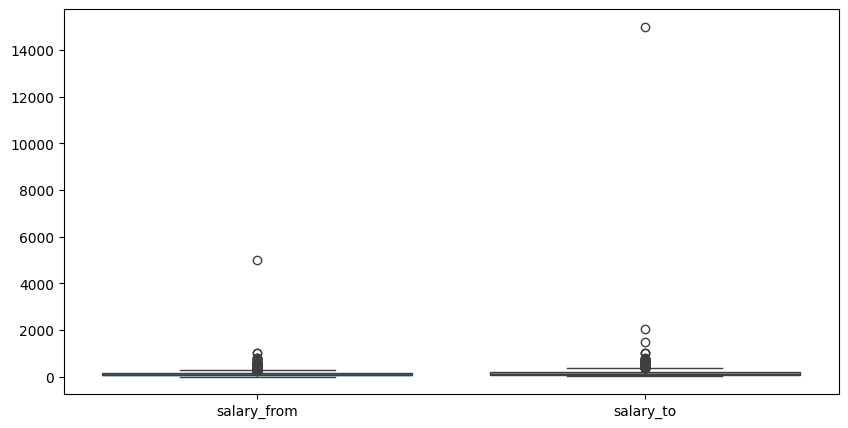

In [43]:
# get boxpolots of salary_from and salary_to,
# and see if we have outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_data[['salary_from', 'salary_to']])
plt.show()

now boxplots with upper outliers hidden

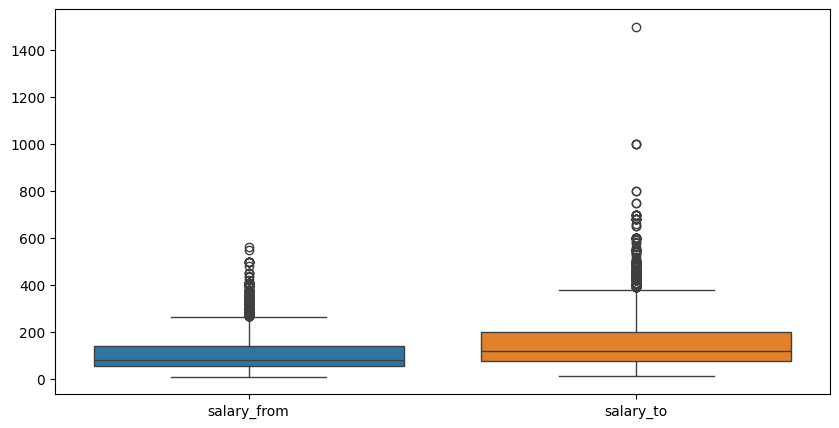

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_data[(merged_data['salary_to'] < 2000)][['salary_from', 'salary_to']])
plt.show()

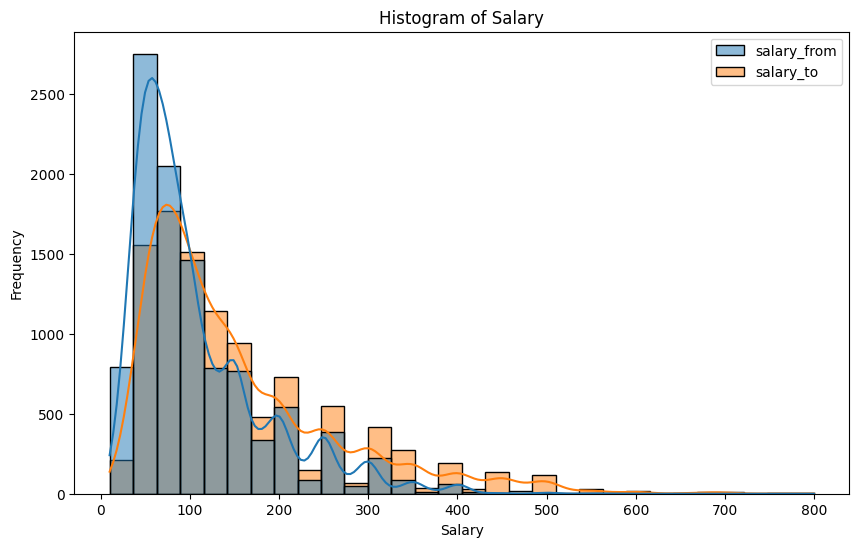

In [45]:
# get twop hist of salary_from and salary_to, add kde to get density plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    merged_data[(merged_data['salary_to'] < 1000)][['salary_from', 'salary_to']],
    kde=True, color='blue', bins=30, )
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

#### Remove salaries from job descriptions

- there may be jobs where description (feature) contains salary values, lets remove them.
- use two sets of regex patterns step-wise.

below is an example processing

In [46]:
import re

def replace_salary_pattern_v1(text, replacement='[NUMBER]'):
    # Regular expression to match numbers from 100,000 to 999,999,999 with optional spaces between thousands
    pattern = re.compile(r'\b\d{1,3}( )?\d{3}( )?\d{3}\b|\b\d{3}( )?\d{3}\b')
    return pattern.sub(replacement, text)

# Example usage
text = "The population of the city is 1 234 567  and 1234567 and 123456 and the budget is 12 345 678. The 2024 small 1000 town has 1234 people and 10000 10 000 but 100000 and 100 000."
print(text)
replaced_text = replace_salary_pattern_v1(text)
print(replaced_text)

The population of the city is 1 234 567  and 1234567 and 123456 and the budget is 12 345 678. The 2024 small 1000 town has 1234 people and 10000 10 000 but 100000 and 100 000.
The population of the city is [NUMBER]  and [NUMBER] and [NUMBER] and the budget is [NUMBER]. The 2024 small 1000 town has 1234 people and 10000 10 000 but [NUMBER] and [NUMBER].


In [47]:
def replace_salary_pattern_v2(text):
    # Regular expression to match another salary patterns
    pattern = r'((оклад|плата|от|до)\W{,3}\d[\d|\W]+\d)\D(?![%лгшчк])'
    
    def replacement(match):
        prefix = match.group(2)
        return f"{prefix} [NUMBER] "
    
    return re.sub(pattern, replacement, text,
                  flags=re.IGNORECASE
                  )

# Example usage
text = "Зарплата от 35 000 - 60 000 рублей. Оклад 50 000. Оклад до 10000 рублей, Опыт работы от 1-5 года. Зарплата 70 000 рублей. Опыт работы от 2-3 лет."
print(text)

result = replace_salary_pattern_v2(text)
print(result)

Зарплата от 35 000 - 60 000 рублей. Оклад 50 000. Оклад до 10000 рублей, Опыт работы от 1-5 года. Зарплата 70 000 рублей. Опыт работы от 2-3 лет.
Зарплата от [NUMBER] рублей. Оклад [NUMBER]  Оклад до [NUMBER] рублей, Опыт работы от 1-5 года. Зарплата [NUMBER] рублей. Опыт работы от 2-3 лет.


In [48]:
merged_data['description_no_numbers'] = merged_data['description'].apply(replace_salary_pattern_v1)
merged_data['description_no_numbers'] = merged_data['description_no_numbers']\
            .apply(lambda x: x.replace('₽', ' рублей'))\
            .apply(replace_salary_pattern_v2)

In [49]:
merged_data[merged_data['description'] != merged_data['description_no_numbers']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9613 entries, 2 to 33526
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   9613 non-null   object 
 1   location                9613 non-null   object 
 2   company                 9613 non-null   object 
 3   skills                  6058 non-null   object 
 4   grade                   168 non-null    object 
 5   description             9613 non-null   object 
 6   salary_from             9613 non-null   float64
 7   salary_to               4471 non-null   float64
 8   currency                9613 non-null   object 
 9   source                  9613 non-null   object 
 10  url                     9613 non-null   object 
 11  experience_from         9445 non-null   float64
 12  experience_to           9445 non-null   float64
 13  description_language    9613 non-null   object 
 14  description_no_numbers  9613 non-null   obje

In [50]:
print(merged_data[merged_data['description'] != merged_data['description_no_numbers']][['description']].iloc[3].values)

['Мы — финтех-компания, создаём онлайн-банк и другие сервисы для предпринимателей и предприятий. Ими пользуются более 600 000 клиентов, а создают больше 4 000 сотрудников в России и за границей.\nИщем\nC#-разработчика\nдля создания бэкэнд-сервисов Точки.\nВакансия открыта сразу в нескольких командах. Это отличная возможность попробовать свои силы в разных сервисах и выбрать то направление, которое подходит именно тебе. Ты сможешь поработать максимум в трёх командах по две недели в каждой.\nЧто делать\nРазрабатывать бэкенд-сервисы для бизнеса и команды Точки, а также принимать архитектурные решения. Ты будешь работать с разнообразными задачами — от создания простых админок до разработки сложных, нагруженных бэкендов крупных сервисов.\nТы подойдёшь, если\nЕсть коммерческий опыт разработки на C# от 3 лет.\nЗнаешь, как работать с Entity Framework или Dapper.\nПонимаешь принципы построения систем на базе микросервисной архитектуры.\nЗнаешь, как работать с PostgreSQL, RabbitMQ / Kafka, а так

In [51]:
print(merged_data[merged_data['description'] != merged_data['description_no_numbers']][['description_no_numbers']].iloc[3].values)

['Мы — финтех-компания, создаём онлайн-банк и другие сервисы для предпринимателей и предприятий. Ими пользуются более [NUMBER] клиентов, а создают больше 4 000 сотрудников в России и за границей.\nИщем\nC#-разработчика\nдля создания бэкэнд-сервисов Точки.\nВакансия открыта сразу в нескольких командах. Это отличная возможность попробовать свои силы в разных сервисах и выбрать то направление, которое подходит именно тебе. Ты сможешь поработать максимум в трёх командах по две недели в каждой.\nЧто делать\nРазрабатывать бэкенд-сервисы для бизнеса и команды Точки, а также принимать архитектурные решения. Ты будешь работать с разнообразными задачами — от создания простых админок до разработки сложных, нагруженных бэкендов крупных сервисов.\nТы подойдёшь, если\nЕсть коммерческий опыт разработки на C# от 3 лет.\nЗнаешь, как работать с Entity Framework или Dapper.\nПонимаешь принципы построения систем на базе микросервисной архитектуры.\nЗнаешь, как работать с PostgreSQL, RabbitMQ / Kafka, а та

#### Salary log-transform

transform the target to get more normal-like distribution

In [52]:
import numpy as np

merged_data['log_salary_from'] = np.log(merged_data['salary_from'])
merged_data['log_salary_to'] = np.log(merged_data['salary_to'])

Mean log salary from: 4.516077191798067
Std log salary from: 0.6305547345204044
Mean log salary to: 4.803337964431696
Std log salary to: 0.6654669359074269


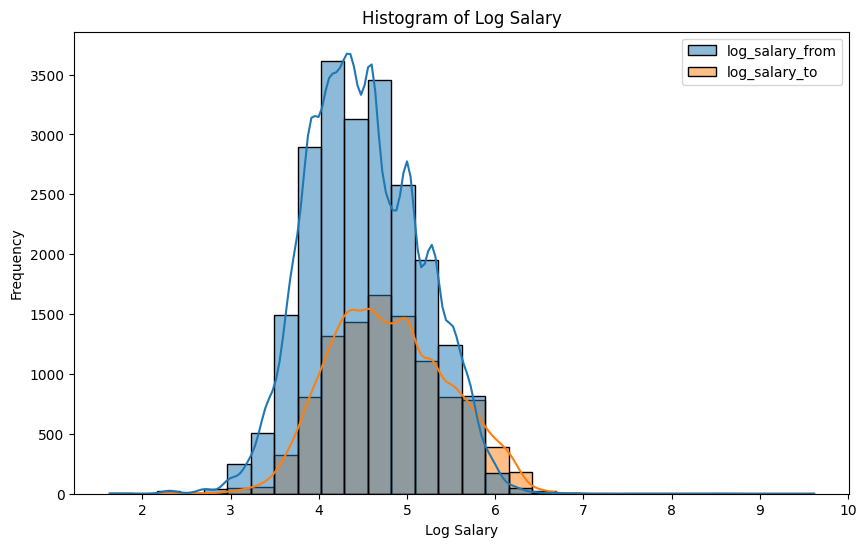

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


# also display mean and std as numbers in the legend, not lines
print('Mean log salary from:', merged_data['log_salary_from'].mean())
print('Std log salary from:', merged_data['log_salary_from'].std())
print('Mean log salary to:', merged_data['log_salary_to'].mean())
print('Std log salary to:', merged_data['log_salary_to'].std())

plt.figure(figsize=(10, 6))
sns.histplot(merged_data[['log_salary_from', 'log_salary_to']],
kde=True, color='blue', bins=30, 
)

plt.title('Histogram of Log Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency') 
plt.show()

## Save as csv

In [54]:
merged_data.to_csv('./data/merged_data_after_preprocessing.csv', index=False)

# 2. Baseline

## Catboost

### Train/test split homogeneity

- check distribution of target in train and test to see if it is similar
- show distribution of target, with frequency normalized to 1

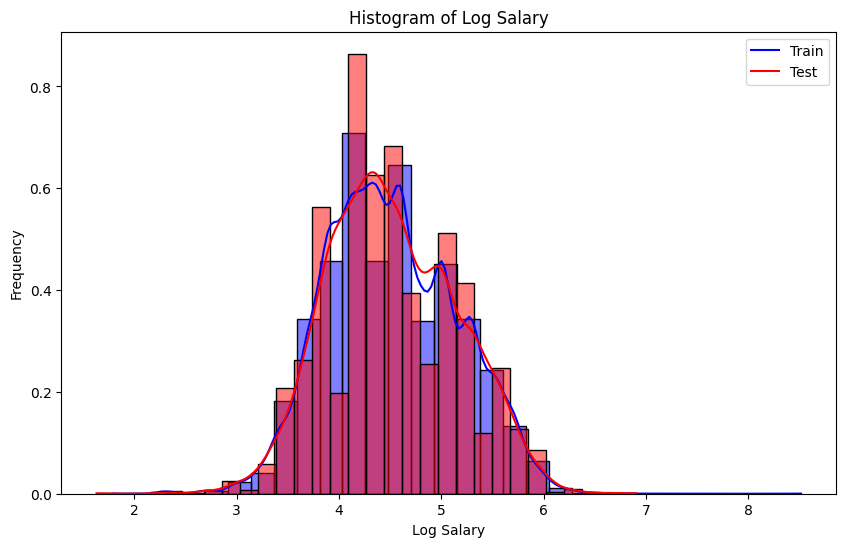

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

X = merged_data[['title', 'location', 'company', 'description']]
y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, color='blue', bins=30, stat='density')
sns.histplot(y_test, kde=True, color='red', bins=30, stat='density')

plt.title('Histogram of Log Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.legend(['Train', 'Test'])
plt.show()

### Service method for displaying model's output

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


def display_metrics_with_ci(history: dict):
    # plot mean and ci for train and test r2 for all seeds and all iterations, averaged over seeds
    seeds = list(history.keys())
    def mean_confidence_interval(data, confidence=0.95):
        n = len(data)
        m, se = np.mean(data), np.std(data) / np.sqrt(n)
        h = se * t.ppf((1 + confidence) / 2, n-1)
        return m, m-h, m+h

    r2_train_values = [history[seed]['r2_train'] for seed in seeds]
    r2_test_values = [history[seed]['r2_test'] for seed in seeds]

    r2_train_values = np.array(r2_train_values)
    r2_test_values = np.array(r2_test_values)

    r2_train_mean = np.mean(r2_train_values, axis=0)
    r2_test_mean = np.mean(r2_test_values, axis=0)

    r2_train_ci = np.array([mean_confidence_interval(r2_train_values[:, i]) for i in range(r2_train_values.shape[1])])
    r2_test_ci = np.array([mean_confidence_interval(r2_test_values[:, i]) for i in range(r2_test_values.shape[1])])

    plt.figure(figsize=(10, 6))
    plt.plot(r2_train_mean, label='train')
    plt.fill_between(range(len(r2_train_mean)), r2_train_ci[:, 1], r2_train_ci[:, 2], alpha=0.3)

    plt.plot(r2_test_mean, label='test')
    plt.fill_between(range(len(r2_test_mean)), r2_test_ci[:, 1], r2_test_ci[:, 2], alpha=0.3)
    plt.title('Mean R2 by iteration, with 95% CI')
    plt.xlabel('Iteration')
    plt.ylabel('R2')
    plt.legend()
    plt.show()

    r2_values = [history[seed]['r2'] for seed in seeds]
    mae_values = [history[seed]['mae'] for seed in seeds]
    rmse_values = [history[seed]['rmse'] for seed in seeds]


    r2_mean, r2_lower, r2_upper = mean_confidence_interval(r2_values)
    mae_mean, mae_lower, mae_upper = mean_confidence_interval(mae_values)
    rmse_mean, rmse_lower, rmse_upper = mean_confidence_interval(rmse_values)

    print('TEST METRICS:')
    print(f'R2: mean = {r2_mean:.4f}, 95% CI = [{r2_lower:.4f}, {r2_upper:.4f}]')
    print(f'MAE: mean = {mae_mean:.4f}, 95% CI = [{mae_lower:.4f}, {mae_upper:.4f}]')
    print(f'RMSE: mean = {rmse_mean:.4f}, 95% CI = [{rmse_lower:.4f}, {rmse_upper:.4f}]')


### Raw data + raw non-log target

RAW_DATA_RAW_TARGET

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0701939	test: 0.0696377	best: 0.0696377 (0)	total: 1.41s	remaining: 7m
150:	learn: 0.7472657	test: 0.5677438	best: 0.5679077 (147)	total: 4m 39s	remaining: 4m 35s
299:	learn: 0.8220208	test: 0.6014238	best: 0.6014238 (299)	total: 9m 47s	remaining: 0us

bestTest = 0.601423757
bestIteration = 299

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0609505	test: 0.0621782	best: 0.0621782 (0)	total: 1.88s	remaining: 9m 22s
150:	learn: 0.7403715	test: 0.6058157	best: 0.6058157 (150)	total: 5m 12s	remaining: 5m 7s
299:	learn: 0.8219425	test: 0.6451588	best: 0.6451588 (299)	total: 10m 8s	remaining: 0us

bestTest = 0.6451588425
bestIteration = 299

Running with seed = 123123
-------------------------------------------------------------------------------

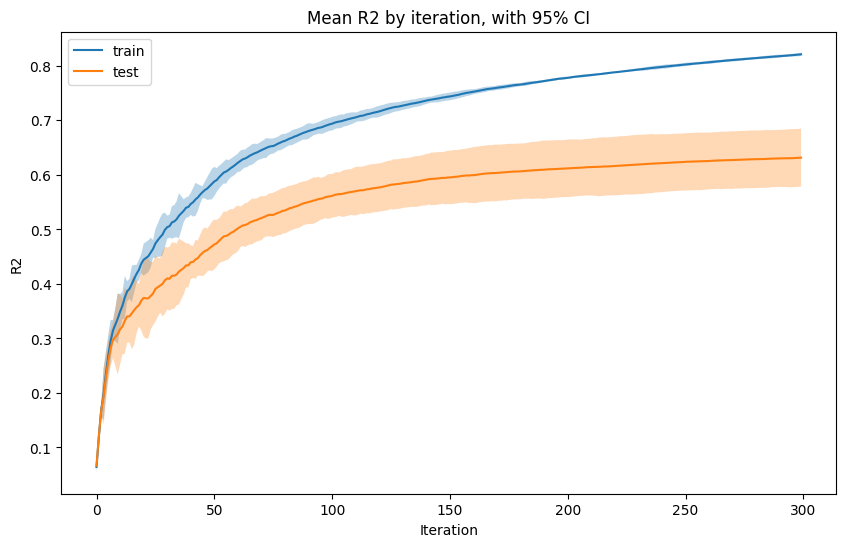

TEST METRICS:
R2: mean = 0.6316, 95% CI = [0.5785, 0.6847]
MAE: mean = 31.7075, 95% CI = [30.8588, 32.5562]
RMSE: mean = 47.5744, 95% CI = [44.2542, 50.8945]


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle


experiment_name = 'raw_data_raw_target'
print(experiment_name.upper())
print('='*100)
print()

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers'
                 ]


X = merged_data[text_features]

y = merged_data['salary_from']

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    experiment_name = 'raw data, raw salary_from target' + f', seed={seed}'
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        random_state=seed,
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations, shape = (n_iterations,)
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

### Raw data + log-transformed target

RAW_DATA_LOG_TARGET

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0700541	test: 0.0661542	best: 0.0661542 (0)	total: 1.89s	remaining: 9m 26s
150:	learn: 0.6966109	test: 0.6417757	best: 0.6417757 (150)	total: 5m 18s	remaining: 5m 14s
299:	learn: 0.7666338	test: 0.6715648	best: 0.6715648 (299)	total: 10m 46s	remaining: 0us

bestTest = 0.6715648256
bestIteration = 299

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0706777	test: 0.0705878	best: 0.0705878 (0)	total: 1.92s	remaining: 9m 33s
150:	learn: 0.6960566	test: 0.6428149	best: 0.6428149 (150)	total: 5m 24s	remaining: 5m 20s
299:	learn: 0.7704177	test: 0.6729837	best: 0.6729837 (299)	total: 10m 51s	remaining: 0us

bestTest = 0.6729836665
bestIteration = 299

Running with seed = 123123
-----------------------------------------------------------------------

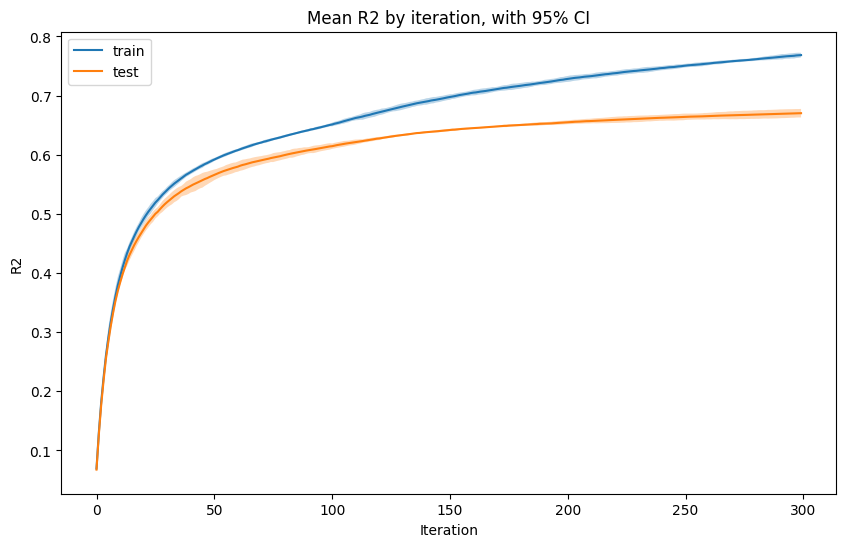

TEST METRICS:
R2: mean = 0.6703, 95% CI = [0.6630, 0.6775]
MAE: mean = 0.2769, 95% CI = [0.2706, 0.2832]
RMSE: mean = 0.3609, 95% CI = [0.3567, 0.3652]


In [58]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle


experiment_name = 'raw_data_log_target'
print(experiment_name.upper())
print('='*100)
print()

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers'
                 ]
X = merged_data[text_features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        random_state=seed,
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

- Much less noise in the predictions.  
- Log-transformed target will be used for all downstream experiments

### With Skills as a feature

#### A. Concatenate skills + description

In [59]:
merged_data['description_no_numbers_with_skills'] = merged_data['description_no_numbers'] + ' ' + merged_data['skills'].fillna('')

SKILLS_WITH_DESCRIPTION_MERGED

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0695038	test: 0.0658547	best: 0.0658547 (0)	total: 1.61s	remaining: 8m 1s
150:	learn: 0.6990862	test: 0.6444229	best: 0.6444229 (150)	total: 3m 47s	remaining: 3m 44s
299:	learn: 0.7698765	test: 0.6747269	best: 0.6747269 (299)	total: 8m 23s	remaining: 0us

bestTest = 0.6747269092
bestIteration = 299

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0686702	test: 0.0685352	best: 0.0685352 (0)	total: 1.54s	remaining: 7m 40s
150:	learn: 0.7016052	test: 0.6464992	best: 0.6464992 (150)	total: 4m 52s	remaining: 4m 48s
299:	learn: 0.7733519	test: 0.6720790	best: 0.6720790 (299)	total: 9m 39s	remaining: 0us

bestTest = 0.6720789856
bestIteration = 299

Running with seed = 123123
---------------------------------------------------------------

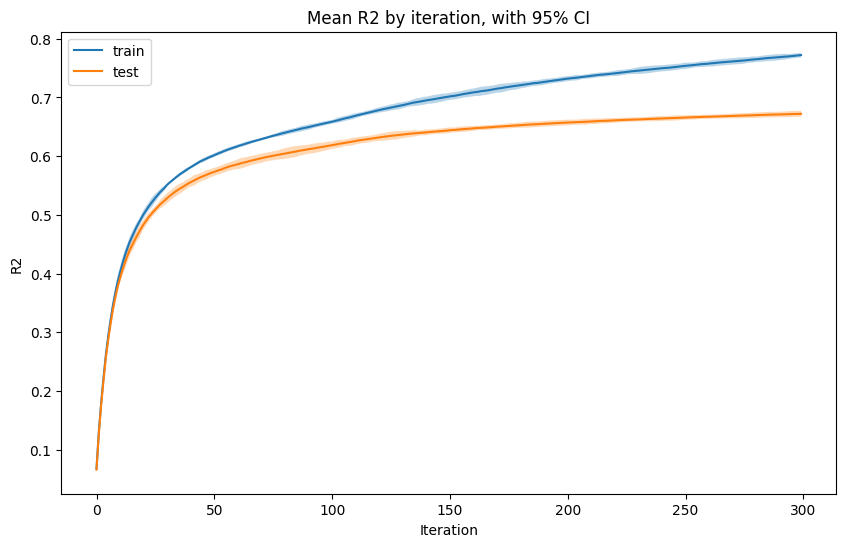

TEST METRICS:
R2: mean = 0.6721, 95% CI = [0.6668, 0.6774]
MAE: mean = 0.2765, 95% CI = [0.2721, 0.2808]
RMSE: mean = 0.3599, 95% CI = [0.3564, 0.3635]


In [61]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle

experiment_name = 'skills_with_description_merged'
print(experiment_name.upper())
print('='*100)
print()

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
                 ]
X = merged_data[text_features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        random_state=seed,
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

#### B. Skills as a separate feature

In [62]:
# fill missing values with empty string
merged_data['skills'] = merged_data['skills'].fillna('')

SKILLS_AS_SEPARATE_FEATURES

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0680506	test: 0.0644990	best: 0.0644990 (0)	total: 2.23s	remaining: 11m 5s
150:	learn: 0.6977819	test: 0.6415118	best: 0.6415118 (150)	total: 5m 14s	remaining: 5m 9s
299:	learn: 0.7677044	test: 0.6717208	best: 0.6717208 (299)	total: 10m 22s	remaining: 0us

bestTest = 0.6717207875
bestIteration = 299

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0667718	test: 0.0661805	best: 0.0661805 (0)	total: 2.03s	remaining: 10m 7s
150:	learn: 0.6969940	test: 0.6462872	best: 0.6462872 (150)	total: 6m	remaining: 5m 55s
299:	learn: 0.7706954	test: 0.6752737	best: 0.6752737 (299)	total: 12m 20s	remaining: 0us

bestTest = 0.6752736559
bestIteration = 299

Running with seed = 123123
--------------------------------------------------------------------

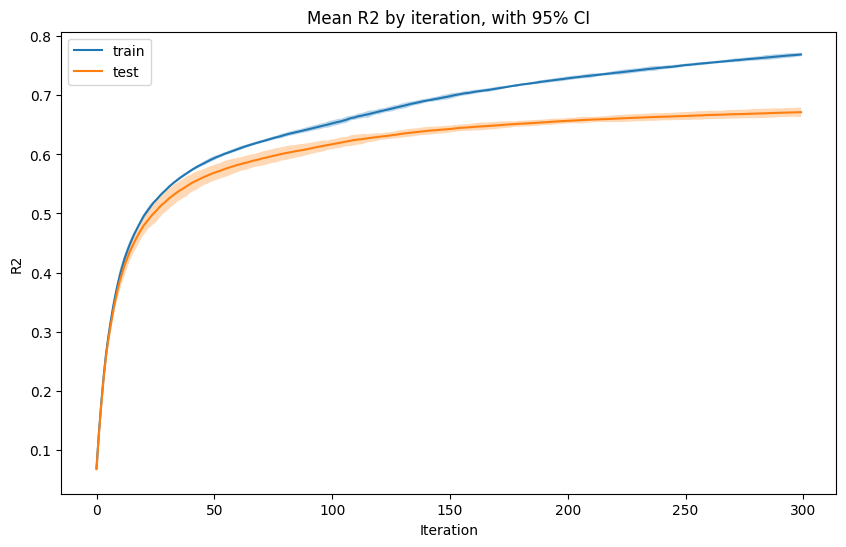

TEST METRICS:
R2: mean = 0.6715, 95% CI = [0.6636, 0.6794]
MAE: mean = 0.2766, 95% CI = [0.2702, 0.2830]
RMSE: mean = 0.3603, 95% CI = [0.3558, 0.3648]


In [63]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle

experiment_name = 'skills_as_separate_features'
print(experiment_name.upper())
print('='*100)
print()

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers',
    'skills',
]
X = merged_data[text_features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        random_state=seed,
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

Let's keep the skills merged with the description

### With Experience years as a feature

#### Extract experience years

##### Regex to extract years with example usage

In [64]:
import re

test_cases = [
    "Опыт в автоматизации тестирования от 1-го года",
    "Опыт в автоматизации тестирования от года",
    "Опыт в автоматизации тестирования до года",
    "Опыт в автоматизации тестирования менее года",
    "Опыт в автоматизации тестирования более года",
    "Опыт работы от 2-х до 5-и лет",
    "Опыт работы от 2033-х до 50-и лет",
    "От 1-го до 2-х года",
    "Требуется опыт от 3-х до 7-и лет работы",
    "Опыт от 1 до 3 лет",
    "Опыт разработки на Java от 3 лет.",
    "Опыт работы 3–6 лет.",
    "3+ года опыта работы Backend-разработчиком с нашим стеком.",
    "Опыт в автоматизации тестирования от 1-го года на Python + PyTest, Allure, а также аналогичный опыт автоматизации на JS.",
    "2+ года опыта проведение академических или индустриальных исследований.",
    "Опыт разработки на Java от 3 лет.",
    "Имеете опыт работы от 3 лет.",
    "Опыт разработки на платформе .NET 4–5 лет, желательно .NET Core.",
    "Опыт в сфере бизнес-/системного анализа от 3 лет.",
    "Опыт разработки на Java от 6 лет.",
    "Опыт работы 3–6 лет.",
    "Опыт работы на позиции руководителя проектов направления аналитики данных либо тимлида в части разработки/внедрения или эксплуатации BI-систем от 2 лет.",
    "Опыт разработки на Python от 5 лет.",
    "Имеете опыт работы от 3 лет.",
    "Опыт функционального тестирования от года.",
    "У вас есть опыт работы в качестве автоматизатора тестирования/SDET от 2 лет.",
    "Опыт работы лидом в командах аналитики от 1 года (команда от 2 человек), опыт найма и развития сотрудников.",
    "3+ года опыта работы Backend-разработчиком с нашим стеком.",
    "2+ года опыта проведение академических или индустриальных исследований, включая обзор литературы.",
    "Опыт в автоматизации тестирования от 1-го года на Python + PyTest, Allure, а также аналогичный опыт автоматизации на JS.",
    "Опыт в рекрутменте от 1 года (in-house или в агентстве).",
    """Ожидания
Опыт разработки на Java от 3 лет.
Опыт коммерческой разработки на Java 11+ или Kotlin.""",
"""частвовать в обсуждении и анализе результатов.
Что нужно, чтобы к нам присоединиться
Опыт разработки на Python от четырех лет. Идеально, если есть опыт работы с бэкендом.
Знание основ Computer Science: структуры данных, базовые алгоритмы, вычислительная сложность.
Понимание основных принципов и алгоритмов машинного обучения.
Опыт проектирования сис""",
"""Ожидания
Опыт работы: более 6-ти лет.
Обязателен опыт работы в AdTech и знания основных понятий и концепций AdTech / Programmatic (механики аукционов, механики атрибуции, управления ставками и стоимостями, способы учета конверсий, Fingerprinting и идентификация пользователей, способы построения моделей оценки CTR, CvR).
Хорошее знание математики (линейная алгебра, математическая статистика, линейное программирование), алгоритмы.
Уверенное владение Python.""",
"""боту.
Проектировать и внедрять отказоустойчивую архитектуру приложений.
Договариваться с коллегами и находить лучшие решения для проекта.
Требования
Имеете опыт работы от 3–х лет.
Умеете работать с Linux на уровне системного администратора.
Уверенно владеете одним из языков программирования: Go, C#, Python, Java и другие.
Понимаете принципы построени""",
"""ботки с помощью C# и SQL в production.
Знание BCL/CLR.
Навыки написания чистого кода и понимание шаблонов архитектуры.
Опыт работы от 2х лет.
Станет плюсом
Знание SQL Server, Kafka, RabbitMQ, Prometheus, Cassandra, Kubernetes, ClickHouse.
Условия
Свобода выбирать м""",
""" командами менеджеров, аналитиков и разработчиков.
Ожидания
Имеете опыт промышленного применения ML больше года.
Программировали на Python, работали с Numpy, Pandas.
Работали с большими данными и хорошо знаете один из диалектов SQL.
Готовы предлагать идеи и самостоятельно их реализовывать.
Знаете основы алгоритмов и структур данных.
Будет плюсом:""",
"""зация тестовых артефактов.
Требования
Опыт в качестве инженера нагрузочного тестирования от 6 месяцев.
Написание / актуализация методики нагрузочного тестирования.
Проведение тестов."""
]

def extract_numbers(text):
    text = text.replace('ё', 'е').replace('–', '-')
    # Patterns to be replaced with numbers
    patterns_to_replace = [
        r'(от\s*)год(а)',
        r'(до\s*)год(а)',
        r'(более\s*)год(а)',
        r'(больше\s*)год(а)',
        r'(менее\s*)год(а)',
    ]

    # Replace patterns with numbers
    for pattern in patterns_to_replace:
        text = re.sub(pattern, r'\g<1>1 год', text, flags=re.IGNORECASE)
    
    # Patterns to be replaced with numbers v2
    patterns_to_replace = {
        1: [r'один', r"одного", r"одним"],
        2: ['два', "двух", "двум", "двумя", "полутора", "полтора"],
        3: ['три', "трех", "трем", "тремя"],
        4: ['четыре', "четырех", "четырьмя"],
        5: ['пять', "пяти", "пятью"],
        6: ['шесть', "шести", "шестью"],
        7: ['семь', "семи", "семью"],
        8: ['восемь', "восьми", "восемью",],
        9: ['девять', "девяти", "девятью"],
        10: ['десять', "десяти","десятью",],

    }

    for number, patterns in patterns_to_replace.items():
        new_patterns = []
        for pattern in patterns:
            new_patterns.append(pattern + r'\W')
        patterns_to_replace[number] = new_patterns


    for number, words in patterns_to_replace.items():
        for word in words:
            text = re.sub(word, str(number) + ' ', text, flags=re.IGNORECASE)

    # pattern for months
    text = re.sub(r'\d{1,2}\s{0,2}месяц', '1 год', text, flags=re.IGNORECASE)
    # patterns for numbers 2x to xxxx

    patterns_to_replace = [
        r'[2-9]\d{1,3}',
    ]

    for pattern in patterns_to_replace:
        text = re.sub(pattern, r'', text, flags=re.IGNORECASE)
    
    # print(text)


    # Patterns for different number formats
    patterns = [
        # Pattern for "от года" (implicit 1)
        r'от\s*года',

        # Pattern for ranges with "от" and "до"
        r'(?:(от|более|не менее)\s{0,5})(\d{1,2})(?:-(?:го|й|х|и|ти))?(?:\s*(?:до|–|-)\s*(\d{1,2})(?:-(?:го|й|х|и))?)',
        
        # Pattern for "от X года/лет"
        r'(?:(от|более|не менее)\s{0,5})(\d{1,2})\s{0,5}(год|лет)',
        
        
        # Pattern for X+ years
        # r'(\d{1,2})\+\s*(?:года?|лет)',
        r'(\d{1,2})\+\s{0,5}(год|лет)',
        
        # Simple number with optional suffix
        r'(\d{1,2})(?:-?(?:го|й|х|и|ти))?\s*(год|лет)'
    ]
    
    # Combine results from all patterns
    all_matches = []
    for pattern in patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        all_matches.extend([match for match in matches if match])
    # flatten list of tuples
    all_matches = set([item for sublist in all_matches for item in sublist])
    # replace all \D with ''
    all_matches = [re.sub(r'\D', '', match) for match in all_matches]
    all_matches = list(filter(lambda x: len(x) > 0, all_matches))
    all_matches = [int(match) for match in all_matches]
    if len(all_matches) == 0:
        return None, None
    if max(all_matches) == min(all_matches):
        return min(all_matches), -1
    return min(all_matches), max(all_matches)
    
    # return all_matches


for text in test_cases:
    print(f"Text: {text}")
    print(f"Extracted numbers: {extract_numbers(text)}\n")

Text: Опыт в автоматизации тестирования от 1-го года
Extracted numbers: (1, -1)

Text: Опыт в автоматизации тестирования от года
Extracted numbers: (1, -1)

Text: Опыт в автоматизации тестирования до года
Extracted numbers: (1, -1)

Text: Опыт в автоматизации тестирования менее года
Extracted numbers: (1, -1)

Text: Опыт в автоматизации тестирования более года
Extracted numbers: (1, -1)

Text: Опыт работы от 2-х до 5-и лет
Extracted numbers: (2, 5)

Text: Опыт работы от 2033-х до 50-и лет
Extracted numbers: (None, None)

Text: От 1-го до 2-х года
Extracted numbers: (1, 2)

Text: Требуется опыт от 3-х до 7-и лет работы
Extracted numbers: (3, 7)

Text: Опыт от 1 до 3 лет
Extracted numbers: (1, 3)

Text: Опыт разработки на Java от 3 лет.
Extracted numbers: (3, -1)

Text: Опыт работы 3–6 лет.
Extracted numbers: (6, -1)

Text: 3+ года опыта работы Backend-разработчиком с нашим стеком.
Extracted numbers: (3, -1)

Text: Опыт в автоматизации тестирования от 1-го года на Python + PyTest, Allure

In [65]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22224 entries, 0 to 33529
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     21063 non-

In [66]:
# add only to Nan values
empty_experience_mask = merged_data['experience_from'].isna()
merged_data.loc[empty_experience_mask, 'experience_from'] = merged_data.loc[empty_experience_mask, 'description'].apply(lambda x: extract_numbers(x)[0])
merged_data.loc[empty_experience_mask, 'experience_to'] = merged_data.loc[empty_experience_mask, 'description'].apply(lambda x: extract_numbers(x)[1])

In [67]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22224 entries, 0 to 33529
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     22091 non-

How many with experience empty?

In [68]:
empty_experience_mask = merged_data['experience_from'].isna()
empty_experience_mask.sum()

133

How many with experience and grade empty?

In [69]:
empty_experience_mask = merged_data['experience_from'].isna()
empty_grade_mask = merged_data['grade'].isna()
empty_experience_grade_mask = empty_experience_mask & empty_grade_mask
empty_experience_grade_mask.sum()

0

##### Infer missing experience data from grades

if grade is not empty and experience is not empty, get median experience_from and experience_to for each grade

In [70]:
empty_experience_mask = merged_data['experience_from'].isna()
empty_grade_mask = merged_data['grade'].isna()
grouped_by_grade = merged_data[~empty_experience_mask & ~empty_grade_mask].groupby('grade')[['experience_from', 'experience_to']].median()
grouped_by_grade

,experience_from,experience_to
grade,,
C-level,4.5,-1.0
Junior,1.0,-1.0
Lead,3.0,-1.0
Middle,2.0,-1.0
Middle-to-Senior,3.0,-1.0
Senior,3.0,-1.0


using values from grouped_by_grade, fill in missing values for experience_from and experience_to for each grade in merged_data

In [71]:
empty_experience_mask = merged_data['experience_from'].isna()
for grade, (experience_from, experience_to) in grouped_by_grade.iterrows():
    mask = (merged_data['grade'] == grade) & empty_experience_mask
    merged_data.loc[mask, 'experience_from'] = experience_from
    merged_data.loc[mask, 'experience_to'] = experience_to

How many with experience empty?

In [72]:
empty_experience_mask = merged_data['experience_from'].isna()
empty_experience_mask.sum()

0

In [73]:
merged_data.describe()

,salary_from,salary_to,experience_from,experience_to,log_salary_from,log_salary_to
count,22224.000000,10423.000000,22224.000000,22224.000000,22224.000000,10423.000000
mean,112.141964,154.019205,1.513836,2.917432,4.516077,4.803338
std,84.059810,183.853651,1.354012,2.218699,0.630555,0.665467
min,5.100000,11.000000,0.000000,-1.000000,1.629241,2.397895
25%,60.000000,75.000000,1.000000,3.000000,4.094345,4.317488
50%,90.000000,120.000000,1.000000,3.000000,4.499810,4.787492
75%,150.000000,200.000000,3.000000,3.000000,5.010635,5.298317
max,5000.000000,15000.000000,10.000000,18.000000,8.517193,9.615805


In [74]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22224 entries, 0 to 33529
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     22224 non-

#### Use both experience bounds as a feature

- How to deal with jobs where upper bound is not given?
- Try setting it to 10

In [75]:
merged_data['experience_to_adjusted_10'] = merged_data['experience_to']
merged_data['experience_to_adjusted_10'] = merged_data['experience_to_adjusted_10'].apply(lambda x: 10 if x == -1 else x)

SKILLS_WITH_DESCRIPTION_MERGED_EXPERIENCE_BOTH_BOUNDS

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0975035	test: 0.0970858	best: 0.0970858 (0)	total: 1.67s	remaining: 8m 20s
150:	learn: 0.7394254	test: 0.6906850	best: 0.6906850 (150)	total: 5m 38s	remaining: 5m 33s
299:	learn: 0.8016786	test: 0.7140672	best: 0.7140899 (298)	total: 11m 31s	remaining: 0us

bestTest = 0.714089868
bestIteration = 298

Shrink model to first 299 iterations.
Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0948851	test: 0.0924503	best: 0.0924503 (0)	total: 2.19s	remaining: 10m 56s
150:	learn: 0.7393864	test: 0.6909954	best: 0.6909954 (150)	total: 5m 28s	remaining: 5m 23s
299:	learn: 0.8010952	test: 0.7133341	best: 0.7133341 (299)	total: 9m 41s	remaining: 0us

bestTest = 0.7133341072
bestIteration = 299

Running with seed = 123123


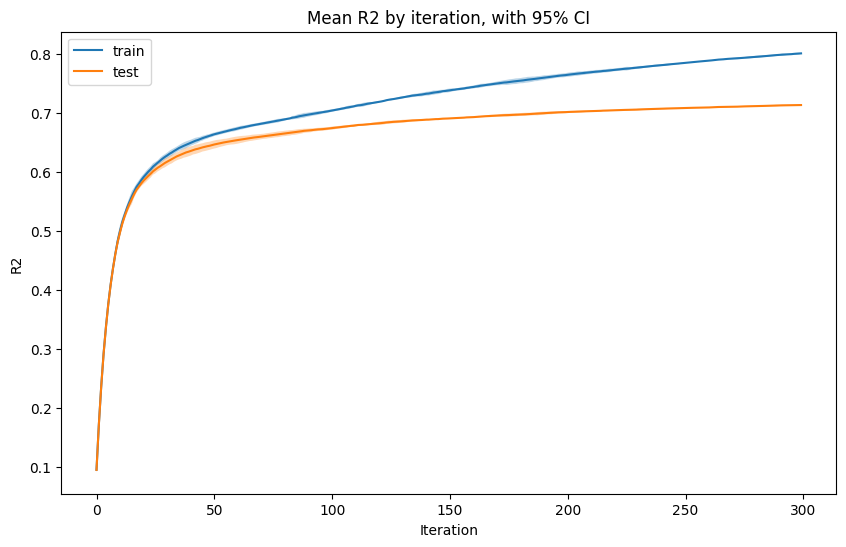

TEST METRICS:
R2: mean = 0.7135, 95% CI = [0.7126, 0.7145]
MAE: mean = 0.2571, 95% CI = [0.2566, 0.2577]
RMSE: mean = 0.3364, 95% CI = [0.3352, 0.3376]


In [76]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle

experiment_name = 'skills_with_description_merged_experience_both_bounds'
print(experiment_name.upper())
print('='*100)
print()

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
                 ]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
]

features = text_features + numeric_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        random_state=seed,
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

Variability in the predictions has decreased, and the mean prediction got quite an improvement

### With Custom Text Processing

#### Tokenization

default tokenization

In [77]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer()

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

# take a small sample of data
text_small = merged_data['description_no_numbers_with_skills'].sample(1, random_state=546456)

tokenized_text = tokenize_texts(text_small)
tokenized_text

[['Ищем',
  'в',
  'команду',
  'крепкого\nстаршего',
  'коммуникационного',
  'дизайнера\nна',
  'B2B-направление.\nЧем',
  'предстоит',
  'заниматься\nСоздавать',
  'идеи',
  'для',
  'креативов,',
  'собирать',
  'кейвижуалы.\nРаботать',
  'с',
  'внешними',
  'и',
  'внутренними',
  'коммуникациями',
  '(в',
  'основном',
  'диджитал,',
  'а',
  'также',
  'офлайн).\nСовместно',
  'с',
  'командой',
  'развивать',
  'визуальный',
  'язык,',
  'придумывать',
  'и',
  'внедрять',
  'новые',
  'визуальные',
  'решения.\nЛидировать',
  'команду',
  'дизайнеров,',
  'а',
  'также',
  'курировать',
  'работу',
  'подрядчиков.\nСоздавать',
  'гайдлайны',
  'и',
  'следить',
  'за',
  'их',
  'соблюдением',
  'и',
  'развитием.\nЧто',
  'нам',
  'важно\nХороший',
  'вкус',
  'и',
  'насмотренность,',
  'высокий',
  'технический',
  'скилл.\nУмение',
  'думать',
  'и',
  'задавать',
  'вопросы.\nОпыт',
  'от',
  '4',
  'лет,',
  'сильные',
  'кейсы',
  'в',
  'портфолио.\nЗнание',
  'пакета

fix splitting, add lowercase and languages

In [78]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

# take a small sample of data
text_small = merged_data['description_no_numbers_with_skills'].sample(1, random_state=546456)

tokenized_text = tokenize_texts(text_small)
tokenized_text

[['ищем',
  'в',
  'команду',
  'крепкого',
  'старшего',
  'коммуникационного',
  'дизайнера',
  'на',
  'b2b',
  'направление',
  'чем',
  'предстоит',
  'заниматься',
  'создавать',
  'идеи',
  'для',
  'креативов',
  'собирать',
  'кейвижуалы',
  'работать',
  'с',
  'внешними',
  'и',
  'внутренними',
  'коммуникациями',
  'в',
  'основном',
  'диджитал',
  'а',
  'также',
  'офлайн',
  'совместно',
  'с',
  'командой',
  'развивать',
  'визуальный',
  'язык',
  'придумывать',
  'и',
  'внедрять',
  'новые',
  'визуальные',
  'решения',
  'лидировать',
  'команду',
  'дизайнеров',
  'а',
  'также',
  'курировать',
  'работу',
  'подрядчиков',
  'создавать',
  'гайдлайны',
  'и',
  'следить',
  'за',
  'их',
  'соблюдением',
  'и',
  'развитием',
  'что',
  'нам',
  'важно',
  'хороший',
  'вкус',
  'и',
  'насмотренность',
  'высокий',
  'технический',
  'скилл',
  'умение',
  'думать',
  'и',
  'задавать',
  'вопросы',
  'опыт',
  'от',
  '4',
  'лет',
  'сильные',
  'кейсы',
  '

numbers to a special token

In [79]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

# take a small sample of data
text_small = merged_data['description_no_numbers_with_skills'].sample(1, random_state=546456)

tokenized_text = tokenize_texts(text_small)
tokenized_text

[['ищем',
  'в',
  'команду',
  'крепкого',
  'старшего',
  'коммуникационного',
  'дизайнера',
  'на',
  'b2b',
  'направление',
  'чем',
  'предстоит',
  'заниматься',
  'создавать',
  'идеи',
  'для',
  'креативов',
  'собирать',
  'кейвижуалы',
  'работать',
  'с',
  'внешними',
  'и',
  'внутренними',
  'коммуникациями',
  'в',
  'основном',
  'диджитал',
  'а',
  'также',
  'офлайн',
  'совместно',
  'с',
  'командой',
  'развивать',
  'визуальный',
  'язык',
  'придумывать',
  'и',
  'внедрять',
  'новые',
  'визуальные',
  'решения',
  'лидировать',
  'команду',
  'дизайнеров',
  'а',
  'также',
  'курировать',
  'работу',
  'подрядчиков',
  'создавать',
  'гайдлайны',
  'и',
  'следить',
  'за',
  'их',
  'соблюдением',
  'и',
  'развитием',
  'что',
  'нам',
  'важно',
  'хороший',
  'вкус',
  'и',
  'насмотренность',
  'высокий',
  'технический',
  'скилл',
  'умение',
  'думать',
  'и',
  'задавать',
  'вопросы',
  'опыт',
  'от',
  '[NUMBER]',
  'лет',
  'сильные',
  'кейс

SKILLS_WITH_DESCRIPTION_MERGED_EXPERIENCE_BOTH_BOUNDS_CUSTOM_TOKENIZER

Running with seed = 42
----------------------------------------------------------------------------------------------------


0:	learn: 0.0985354	test: 0.0975040	best: 0.0975040 (0)	total: 1.66s	remaining: 8m 17s
150:	learn: 0.7562280	test: 0.7039426	best: 0.7039426 (150)	total: 4m 4s	remaining: 4m
299:	learn: 0.8157031	test: 0.7235305	best: 0.7235305 (299)	total: 8m 6s	remaining: 0us

bestTest = 0.7235305232
bestIteration = 299

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0980908	test: 0.0962645	best: 0.0962645 (0)	total: 1.54s	remaining: 7m 41s
150:	learn: 0.7542878	test: 0.7050343	best: 0.7050343 (150)	total: 4m 3s	remaining: 4m
299:	learn: 0.8154413	test: 0.7251436	best: 0.7251436 (299)	total: 8m 6s	remaining: 0us

bestTest = 0.72514358
bestIteration = 299

Running with seed = 123123
----------------------------------------------------------------------------------------------------
0:	learn: 0.0977203	test: 0.0978924	best: 0.0978924 (0)	total: 1.61s	remaining: 8m 2s
150:	learn: 0.7552951	test: 0.7094174	best: 0

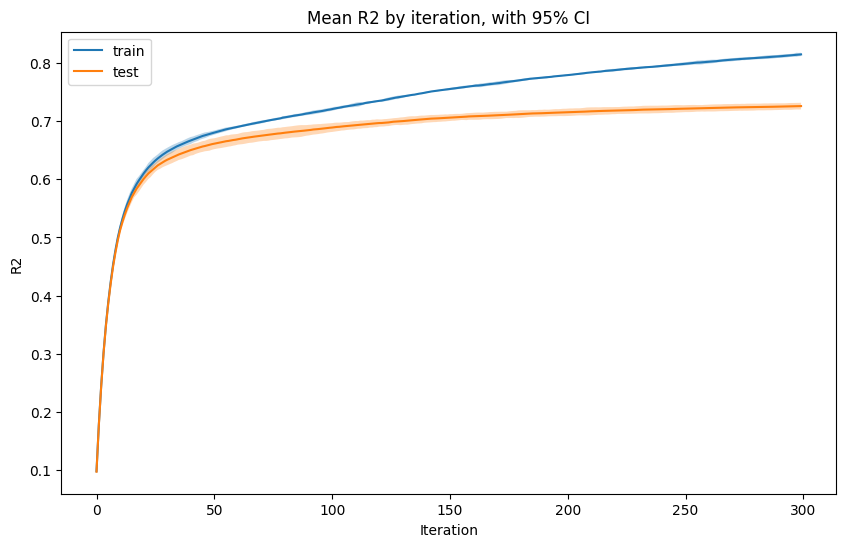

TEST METRICS:
R2: mean = 0.7259, 95% CI = [0.7202, 0.7317]
MAE: mean = 0.2518, 95% CI = [0.2484, 0.2552]
RMSE: mean = 0.3291, 95% CI = [0.3261, 0.3321]


In [80]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle

experiment_name = 'skills_with_description_merged_experience_both_bounds_custom_tokenizer'
print(experiment_name.upper())
print('='*100)
print()

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
                 ]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
]

features = text_features + numeric_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        early_stopping_rounds=10,
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                "tokenizer_id" : "Space",
                "separator_type" : "ByDelimiter",
                "split_by_set" : "True",
                "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                "languages": ['ru', 'en'],
                "number_process_policy":'Replace',
                "number_token":'[NUMBER]',
            }],
        random_state=seed,
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

#### Reduced dictionary size

Can we reduce dictionary size (to increase training speed) without a noticeable drop in quality?

##### How many tokens do we have?

See the text len distribution for the whole dataset

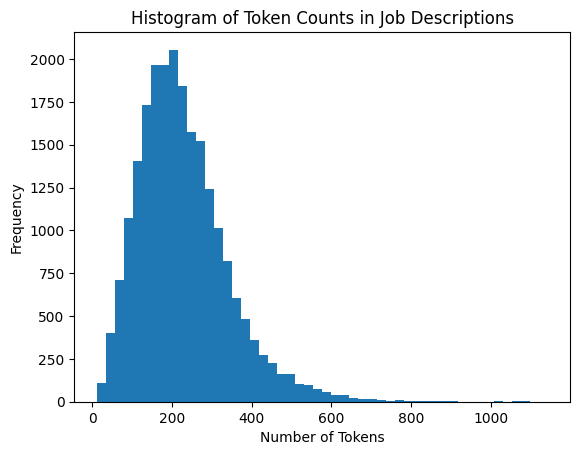

In [81]:
from matplotlib import pyplot as plt
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]


texts = merged_data['description_no_numbers_with_skills']

tokenized_text = tokenize_texts(texts)

# plot histogram of token counts
token_counts = [len(tokens) for tokens in tokenized_text]
plt.hist(token_counts, bins=50)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Token Counts in Job Descriptions')
plt.show()

Get dictionary size - How many unique tokens in the corpus?

In [82]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

# take a small sample of data
texts = merged_data['description_no_numbers_with_skills']

tokenized_text = tokenize_texts(texts)
print(f"Dict size: {len(set([token for tokens in tokenized_text for token in tokens]))}")

Dict size: 101305


How many unique tokens in the corpus with the frequency above the given threshold?

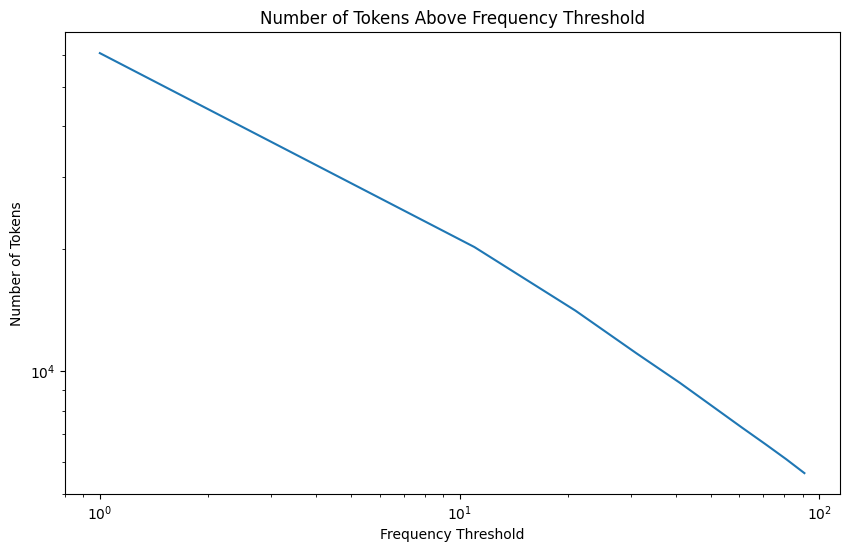

In [83]:
from collections import Counter
import numpy as np

token_counter = Counter()
for tokens in tokenized_text:
    token_counter.update(tokens)

# get token frequency
token_frequency = list(token_counter.values())
token_frequency.sort(reverse=True)

# create a lineplot, where x is threshold, and y is number of tokens above threshold
token_frequency = np.array(token_frequency)
count_thresholds = list(range(1, 100, 10))
n_tokens_above_threshold = [np.sum(token_frequency > threshold) for threshold in count_thresholds]
plt.figure(figsize=(10, 6))

plt.plot(count_thresholds, n_tokens_above_threshold)
plt.title('Number of Tokens Above Frequency Threshold')
plt.xlabel('Frequency Threshold')
plt.ylabel('Number of Tokens')
plt.yscale('log')
plt.xscale('log')


plt.show()

Let's set dict size to 50K tokens max, and lower bound of token counts is 25

##### Uni- + Bi-gram dicts

SKILLS_WITH_DESCRIPTION_MERGED_EXPERIENCE_BOTH_BOUNDS_CUSTOM_TOKENIZER_REDUCED_DICT

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0968411	test: 0.0965384	best: 0.0965384 (0)	total: 582ms	remaining: 2m 54s
150:	learn: 0.7641577	test: 0.7068025	best: 0.7068025 (150)	total: 1m 44s	remaining: 1m 42s
299:	learn: 0.8329554	test: 0.7283122	best: 0.7283122 (299)	total: 3m 50s	remaining: 0us

bestTest = 0.7283122221
bestIteration = 299

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0951826	test: 0.0937085	best: 0.0937085 (0)	total: 846ms	remaining: 4m 12s
150:	learn: 0.7657317	test: 0.7100314	best: 0.7100314 (150)	total: 2m 25s	remaining: 2m 23s
299:	learn: 0.8330355	test: 0.7290362	best: 0.7290362 (299)	total: 4m 51s	remaining: 0us

bestTest = 0.7290361976
bestIteration = 299

Running with seed = 123123
---------

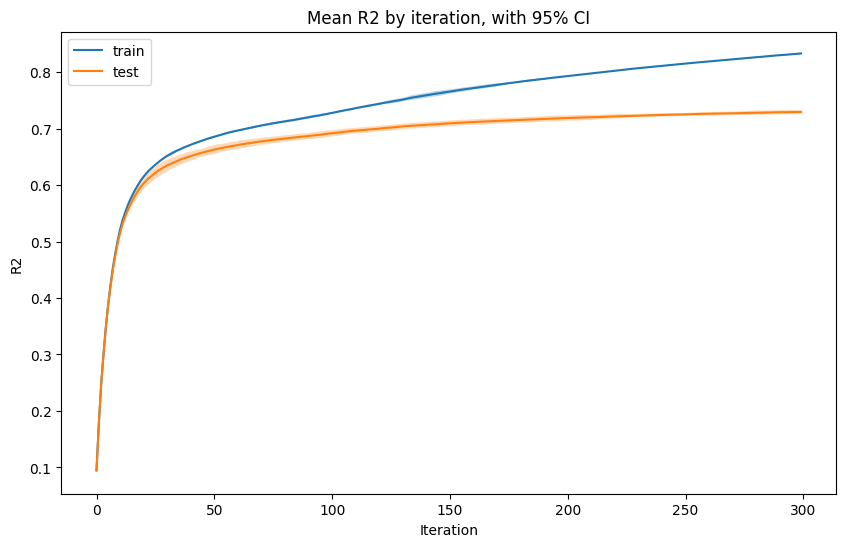

TEST METRICS:
R2: mean = 0.7296, 95% CI = [0.7261, 0.7332]
MAE: mean = 0.2502, 95% CI = [0.2474, 0.2531]
RMSE: mean = 0.3268, 95% CI = [0.3251, 0.3285]


In [84]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import pickle

experiment_name = 'skills_with_description_merged_experience_both_bounds_custom_tokenizer_reduced_dict'
print(experiment_name.upper())
print('='*100)
print()

dict_size = 50_000
dict_lower_bound = 25

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
                 ]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
]

features = text_features + numeric_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        early_stopping_rounds=10,
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                "tokenizer_id" : "Space",
                "separator_type" : "ByDelimiter",
                "split_by_set" : "True",
                "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                "languages": ['ru', 'en'],
                "number_process_policy":'Replace',
                "number_token":'[NUMBER]',
            }],
        random_state=seed,
        dictionaries = [{
            "dictionary_id" : "BiGram",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "2"
        }, {
            "dictionary_id" : "Word",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "1"
        }],
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

Can we keep Word-only dict (to further speed up)?

##### Uni-gram dict only

SKILLS_WITH_DESCRIPTION_MERGED_EXPERIENCE_BOTH_BOUNDS_CUSTOM_TOKENIZER_REDUCED_DICT

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0979217	test: 0.0972452	best: 0.0972452 (0)	total: 688ms	remaining: 3m 25s
150:	learn: 0.7694377	test: 0.7068157	best: 0.7068157 (150)	total: 1m 17s	remaining: 1m 16s
299:	learn: 0.8348100	test: 0.7274068	best: 0.7274068 (299)	total: 2m 29s	remaining: 0us

bestTest = 0.7274067536
bestIteration = 299

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0961833	test: 0.0944908	best: 0.0944908 (0)	total: 611ms	remaining: 3m 2s
150:	learn: 0.7691577	test: 0.7096696	best: 0.7096696 (150)	total: 1m 17s	remaining: 1m 16s
299:	learn: 0.8372430	test: 0.7293787	best: 0.7293787 (299)	total: 2m 39s	remaining: 0us

bestTest = 0.7293786811
bestIteration = 299

Running with seed = 123123
----------

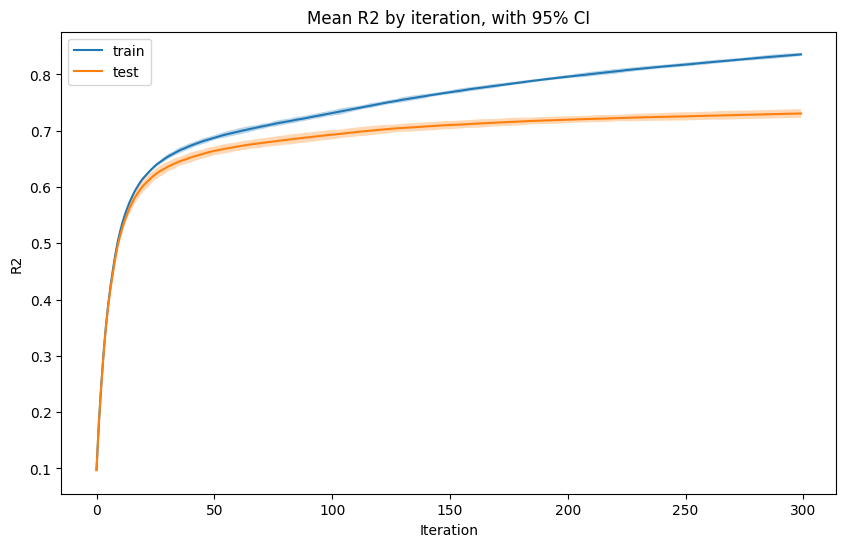

TEST METRICS:
R2: mean = 0.7306, 95% CI = [0.7227, 0.7384]
MAE: mean = 0.2489, 95% CI = [0.2443, 0.2535]
RMSE: mean = 0.3263, 95% CI = [0.3220, 0.3306]


In [85]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import pickle

experiment_name = 'skills_with_description_merged_experience_both_bounds_custom_tokenizer_reduced_dict'
print(experiment_name.upper())
print('='*100)
print()

dict_size = 50_000
dict_lower_bound = 25

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
                 ]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
]

features = text_features + numeric_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        early_stopping_rounds=10,
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                "tokenizer_id" : "Space",
                "separator_type" : "ByDelimiter",
                "split_by_set" : "True",
                "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                "languages": ['ru', 'en'],
                "number_process_policy":'Replace',
                "number_token":'[NUMBER]',
            }],
        random_state=seed,
        dictionaries = [
        {
            "dictionary_id" : "Word",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "1"
        }
        ],
        feature_calcers = ["BoW"]
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

### With description size and job source as features

Finally, extra features to add - description length (# of tokens) and job source category

In [86]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

texts = merged_data['description_no_numbers_with_skills']

tokenized_text = tokenize_texts(texts)
# transform into a series with lengths of tokenized texts (# of tokens)
merged_data['description_size'] = pd.Series([len(tokens) for tokens in tokenized_text])

SKILLS_WITH_DESCRIPTION_MERGED_EXPERIENCE_BOTH_BOUNDS_CUSTOM_TOKENIZER_DESCRIPTION_REDUCED_DICT_DESCR_SIZE_SOURCE

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0994030	test: 0.0974739	best: 0.0974739 (0)	total: 674ms	remaining: 3m 21s
150:	learn: 0.7689143	test: 0.7096540	best: 0.7096540 (150)	total: 1m 18s	remaining: 1m 17s
299:	learn: 0.8375235	test: 0.7271457	best: 0.7271457 (299)	total: 2m 38s	remaining: 0us

bestTest = 0.7271456765
bestIteration = 299

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.1018411	test: 0.1023702	best: 0.1023702 (0)	total: 510ms	remaining: 2m 32s
150:	learn: 0.7706163	test: 0.7139451	best: 0.7139451 (150)	total: 1m 31s	remaining: 1m 30s
299:	learn: 0.8379675	test: 0.7331109	best: 0.7331109 (299)	total: 3m 3s	remaining: 0us

bestTest = 0.7331109368
bestIteration = 299

Running

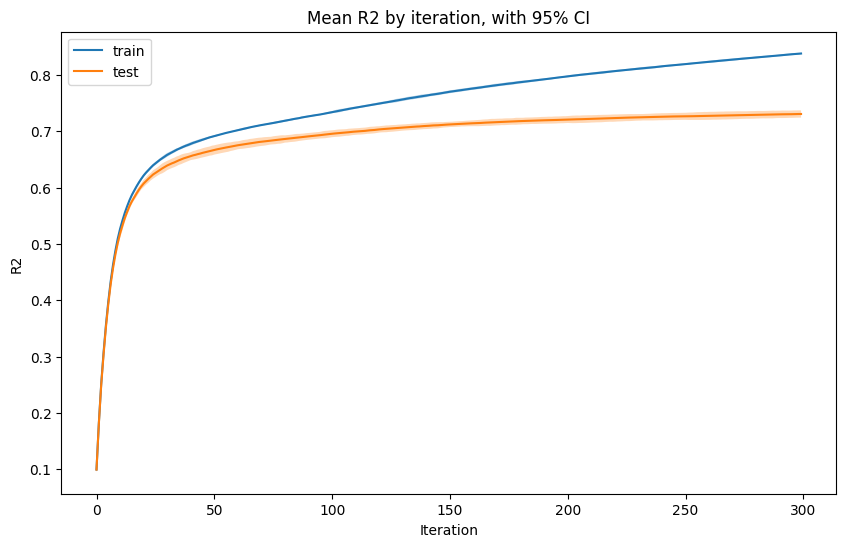

TEST METRICS:
R2: mean = 0.7308, 95% CI = [0.7243, 0.7372]
MAE: mean = 0.2483, 95% CI = [0.2438, 0.2529]
RMSE: mean = 0.3261, 95% CI = [0.3228, 0.3295]


In [87]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import pickle


experiment_name = 'skills_with_description_merged_experience_both_bounds_custom_tokenizer_description_reduced_dict_descr_size_source'
print(experiment_name.upper())
print('='*100)
print()

dict_size = 50_000
dict_lower_bound = 25


text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
]

cat_features = [
    'source',
]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
    'description_size'
]

features = text_features + numeric_features + cat_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )

    model = CatBoostRegressor(
        iterations=300,
        depth=10,
        learning_rate=0.1,
        loss_function='RMSE',
        verbose=150,
        eval_metric='R2',
        early_stopping_rounds=10,
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                "tokenizer_id" : "Space",
                "separator_type" : "ByDelimiter",
                "split_by_set" : "True",
                "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                "languages": ['ru', 'en'],
                "number_process_policy":'Replace',
                "number_token":'[NUMBER]',
            }],
        random_state=seed,
        dictionaries = [
        {
            "dictionary_id" : "Word",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "1"
        }],
        feature_calcers = ["BoW"]
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

### Hyperparameter tuning

In [89]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split


experiment_name = 'hyperparameter_tuning'
print(experiment_name.upper())
print('='*100)
print()

dict_size = 50_000
dict_lower_bound = 25

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
]

cat_features = [
    'source',
]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
    'description_size'
]

features = text_features + numeric_features + cat_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

param_grid = {
        'depth': [4, 10],
        'learning_rate': [0.001, 0.05],
        'l2_leaf_reg': [0, 10],
        "random_strength": [0, 10],
        "bagging_temperature": [0, 10],
    }

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )

    random_search_model = CatBoostRegressor(
        iterations=2000,
        loss_function='RMSE',
        eval_metric='R2',
        verbose=False,
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                    "tokenizer_id" : "Space",
                    "separator_type" : "ByDelimiter",
                    "split_by_set" : "True",
                    "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                    "languages": ['ru', 'en'],
                    "number_process_policy":'Replace',
                    "number_token":'[NUMBER]',
                }],
        random_state=seed,
        dictionaries = [
        {
            "dictionary_id" : "Word",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "1"
        }],
        feature_calcers = ["BoW"]
        )


    random_search_result = random_search_model.randomized_search(
        param_grid, 
        train_pool,
        cv=5,
        n_iter=30, 
        verbose=False,
        partition_random_seed=seed,
        shuffle=True,
    )

    history[seed] = random_search_result

HYPERPARAMETER_TUNING

Running with seed = 42
----------------------------------------------------------------------------------------------------

bestTest = -0.5289877226
bestIteration = 1999


bestTest = 0.4166130037
bestIteration = 150


bestTest = -0.5537235837
bestIteration = 1999


bestTest = -0.5791169807
bestIteration = 1999


bestTest = 0.4208376485
bestIteration = 329


bestTest = -0.6019100356
bestIteration = 1999


bestTest = 0.4209036917
bestIteration = 406


bestTest = -0.5324682526
bestIteration = 1999


bestTest = 0.4131053591
bestIteration = 126


bestTest = -0.5729885814
bestIteration = 1999


bestTest = -0.56054068
bestIteration = 1999


bestTest = 0.420471268
bestIteration = 254


bestTest = -0.604039125
bestIteration = 1999


bestTest = 0.4198929884
bestIteration = 291


bestTest = -0.5289877226
bestIteration = 1999


bestTest = 0.4166130037
bestIteration = 150


bestTest = -0.5537235837
bestIteration = 1999


bestTest = 0.4157925952
bestIteration = 269


bestTest

display params for each seed

In [90]:
for seed, result in history.items():
    print(f'Seed: {seed}')
    print(f'Best params: {result["params"]}')
    print(f'Best R2: {max(result["cv_results"]["test-R2-mean"]):.4f}')

Seed: 42
Best params: {'bagging_temperature': 0, 'random_strength': 10, 'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 10}
Best R2: 0.7231
Seed: 78687
Best params: {'bagging_temperature': 0, 'random_strength': 10, 'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 0}
Best R2: 0.7255
Seed: 123123
Best params: {'bagging_temperature': 0, 'random_strength': 10, 'depth': 4, 'learning_rate': 0.05, 'l2_leaf_reg': 0}
Best R2: 0.7252


### Get best model predictions

BEST_MODEL

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0299896	test: 0.0306632	best: 0.0306632 (0)	total: 9.07ms	remaining: 18.1s
500:	learn: 0.7114043	test: 0.6886138	best: 0.6886138 (500)	total: 5.28s	remaining: 15.8s
1000:	learn: 0.7640935	test: 0.7156612	best: 0.7156612 (1000)	total: 10.1s	remaining: 10s
1500:	learn: 0.7969054	test: 0.7267832	best: 0.7267832 (1500)	total: 14.8s	remaining: 4.92s
1999:	learn: 0.8218735	test: 0.7339598	best: 0.7339598 (1999)	total: 19.5s	remaining: 0us

bestTest = 0.733959752
bestIteration = 1999

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0338803	test: 0.0329262	best: 0.0329262 (0)	total: 12.9ms	remaining: 25.9s
500:	learn: 0.7105182	test: 0.6917676	best: 0.6917676 (500)	total: 5.14s	remaining: 15.4s
1000:	learn: 0.7624777	test: 0.7195882	best: 0.7195882 (1000)	tot

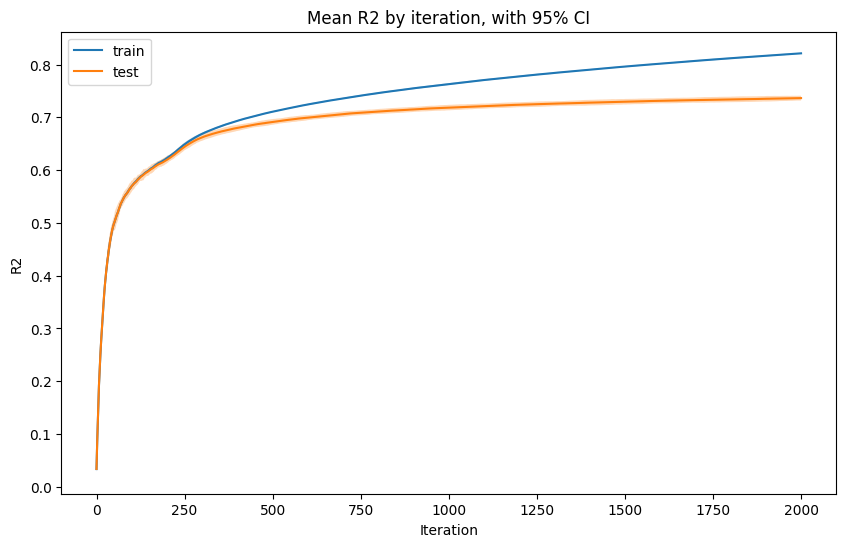

TEST METRICS:
R2: mean = 0.7365, 95% CI = [0.7319, 0.7410]
MAE: mean = 0.2461, 95% CI = [0.2424, 0.2499]
RMSE: mean = 0.3227, 95% CI = [0.3205, 0.3248]


In [91]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import pickle


experiment_name = 'best_model'
print(experiment_name.upper())
print('='*100)
print()

params = {
'bagging_temperature': 0,
 'random_strength': 10,
 'depth': 4,
 'l2_leaf_reg': 0,
 'learning_rate': 0.05
}

dict_size = 50_000
dict_lower_bound = 25

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
]

cat_features = [
    'source',
]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
    'description_size'
]

features = text_features + numeric_features + cat_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )

    model = CatBoostRegressor(
        **params,
        random_state=seed,
        iterations=2000,
        early_stopping_rounds=100,
        loss_function='RMSE',
        verbose=500,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                "tokenizer_id" : "Space",
                "separator_type" : "ByDelimiter",
                "split_by_set" : "True",
                "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                "languages": ['ru', 'en'],
                "number_process_policy":'Replace',
                "number_token":'[NUMBER]',
            }],
        dictionaries = [
        {
            "dictionary_id" : "Word",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "1"
        }],
        feature_calcers = ["BoW"]
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

Let's increase the regularization

BEST_MODEL

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0294279	test: 0.0300917	best: 0.0300917 (0)	total: 9ms	remaining: 18s
500:	learn: 0.7024782	test: 0.6870800	best: 0.6870800 (500)	total: 5.13s	remaining: 15.4s
1000:	learn: 0.7463707	test: 0.7138937	best: 0.7138937 (1000)	total: 9.94s	remaining: 9.92s
1500:	learn: 0.7728798	test: 0.7249719	best: 0.7249719 (1500)	total: 14.8s	remaining: 4.91s
1999:	learn: 0.7929853	test: 0.7312029	best: 0.7312195 (1997)	total: 20s	remaining: 0us

bestTest = 0.7312194647
bestIteration = 1997

Shrink model to first 1998 iterations.
Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0335545	test: 0.0325342	best: 0.0325342 (0)	total: 9.35ms	remaining: 18.7s
500:	learn: 0.7015739	test: 0.6894956	best: 0.6894956 (500)	total: 5.13s	remaining: 15.3s
1000:	learn: 0.7462249	test: 0

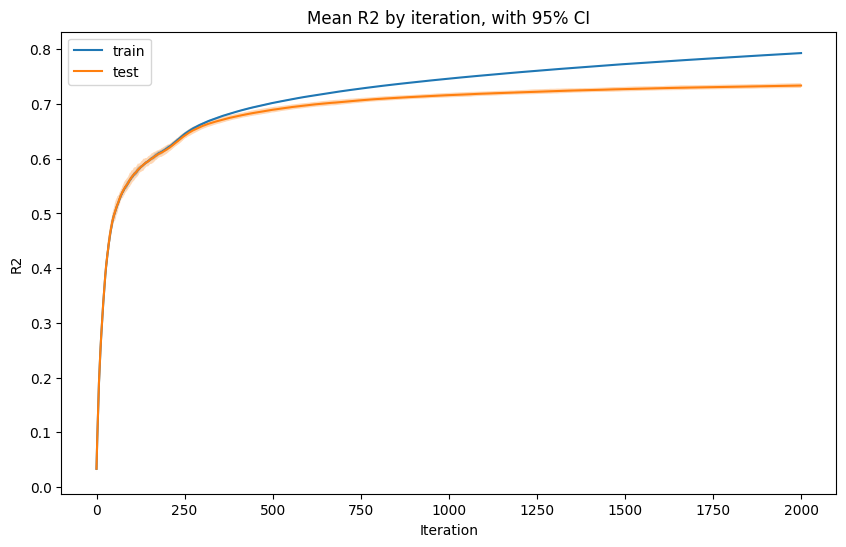

TEST METRICS:
R2: mean = 0.7337, 95% CI = [0.7293, 0.7381]
MAE: mean = 0.2478, 95% CI = [0.2434, 0.2521]
RMSE: mean = 0.3244, 95% CI = [0.3223, 0.3264]


In [92]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import pickle


experiment_name = 'best_model'
print(experiment_name.upper())
print('='*100)
print()

params = {
'bagging_temperature': 0,
 'random_strength': 10,
 'depth': 4,
 'l2_leaf_reg': 10,
 'learning_rate': 0.05
}

dict_size = 50_000
dict_lower_bound = 25

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
]

cat_features = [
    'source',
]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
    'description_size'
]

features = text_features + numeric_features + cat_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )

    model = CatBoostRegressor(
        **params,
        random_state=seed,
        iterations=2000,
        early_stopping_rounds=100,
        loss_function='RMSE',
        verbose=500,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                "tokenizer_id" : "Space",
                "separator_type" : "ByDelimiter",
                "split_by_set" : "True",
                "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                "languages": ['ru', 'en'],
                "number_process_policy":'Replace',
                "number_token":'[NUMBER]',
            }],
        dictionaries = [
        {
            "dictionary_id" : "Word",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "1"
        }],
        feature_calcers = ["BoW"]
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

Let`s keep this one as less overfitting is observed

Now, see if deeper trees work better

BEST_MODEL_DEPTH_8

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0303459	test: 0.0304777	best: 0.0304777 (0)	total: 93.4ms	remaining: 3m 6s
500:	learn: 0.7525192	test: 0.7128945	best: 0.7128945 (500)	total: 59.9s	remaining: 2m 59s
1000:	learn: 0.8156278	test: 0.7342456	best: 0.7342564 (998)	total: 2m 2s	remaining: 2m 1s
1500:	learn: 0.8552646	test: 0.7432933	best: 0.7432933 (1500)	total: 3m 4s	remaining: 1m 1s
1999:	learn: 0.8822083	test: 0.7481682	best: 0.7481682 (1999)	total: 4m 7s	remaining: 0us

bestTest = 0.7481682359
bestIteration = 1999

Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0342474	test: 0.0333149	best: 0.0333149 (0)	total: 102ms	remaining: 3m 23s
500:	learn: 0.7522688	test: 0.7160450	best: 0.7160450 (500)	total: 1m 3s	remaining: 3m 8s
1000:	learn: 0.8156213	test: 0.7383611	best: 0.7383611

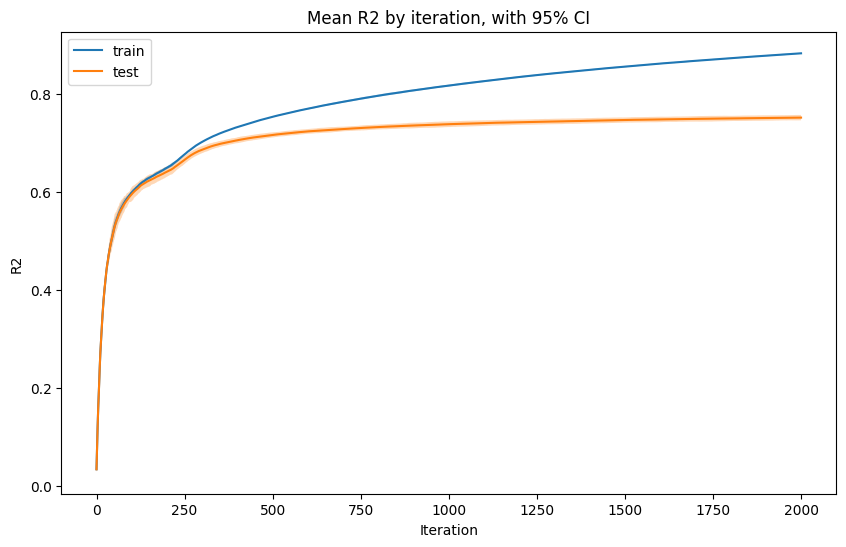

TEST METRICS:
R2: mean = 0.7509, 95% CI = [0.7454, 0.7564]
MAE: mean = 0.2380, 95% CI = [0.2337, 0.2424]
RMSE: mean = 0.3137, 95% CI = [0.3108, 0.3166]


In [93]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import pickle


experiment_name = 'best_model_depth_8'
print(experiment_name.upper())
print('='*100)
print()

params = {
'bagging_temperature': 0,
 'random_strength': 10,
 'depth': 8,
 'l2_leaf_reg': 10,
 'learning_rate': 0.05
}

dict_size = 50_000
dict_lower_bound = 25

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
]

cat_features = [
    'source',
]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
    'description_size'
]

features = text_features + numeric_features + cat_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )

    model = CatBoostRegressor(
        **params,
        random_state=seed,
        iterations=2000,
        early_stopping_rounds=100,
        loss_function='RMSE',
        verbose=500,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                "tokenizer_id" : "Space",
                "separator_type" : "ByDelimiter",
                "split_by_set" : "True",
                "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                "languages": ['ru', 'en'],
                "number_process_policy":'Replace',
                "number_token":'[NUMBER]',
            }],
        dictionaries = [
        {
            "dictionary_id" : "Word",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "1"
        }],
        feature_calcers = ["BoW"]
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

Stronger overfitting :( keep the previous version

### Save the final dataframe version

To be used further by transformers + catboost

In [94]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22224 entries, 0 to 33529
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     22224 non-

In [95]:
merged_data.drop(columns=[
    'grade',
    'salary_to',
    'log_salary_to',
    'currency',
    'url',
    'experience_to',
    'description_language',
    ]).to_csv('./data/merged_data_for_final_catboost.csv', index=False)

### Predictions analysis

Predict by the best model and look at the predictions

BEST_MODEL

Running with seed = 42
----------------------------------------------------------------------------------------------------
0:	learn: 0.0294279	test: 0.0300917	best: 0.0300917 (0)	total: 12.4ms	remaining: 24.8s
500:	learn: 0.7024782	test: 0.6870800	best: 0.6870800 (500)	total: 5.35s	remaining: 16s
1000:	learn: 0.7463707	test: 0.7138937	best: 0.7138937 (1000)	total: 10.1s	remaining: 10.1s
1500:	learn: 0.7728798	test: 0.7249719	best: 0.7249719 (1500)	total: 14.9s	remaining: 4.97s
1999:	learn: 0.7929853	test: 0.7312029	best: 0.7312195 (1997)	total: 19.9s	remaining: 0us

bestTest = 0.7312194647
bestIteration = 1997

Shrink model to first 1998 iterations.
Running with seed = 78687
----------------------------------------------------------------------------------------------------
0:	learn: 0.0335545	test: 0.0325342	best: 0.0325342 (0)	total: 29.1ms	remaining: 58.1s
500:	learn: 0.7015739	test: 0.6894956	best: 0.6894956 (500)	total: 5.11s	remaining: 15.3s
1000:	learn: 0.7462249	te

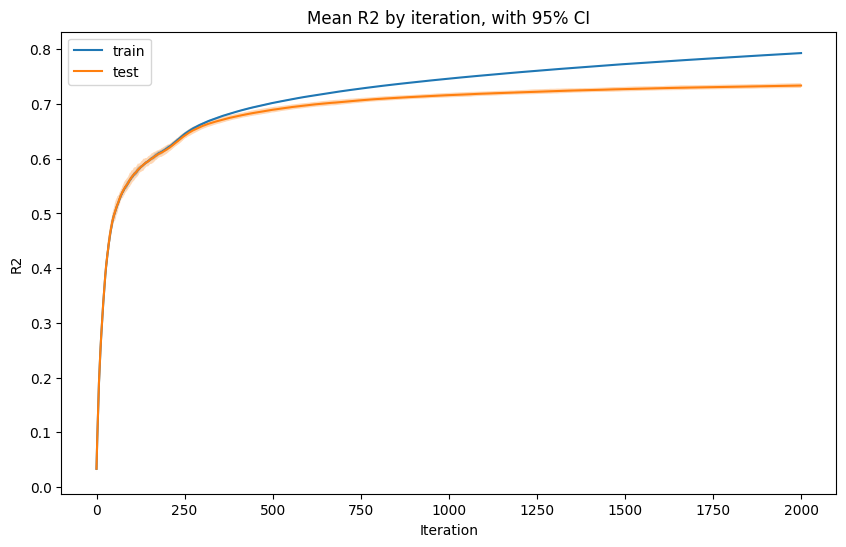

TEST METRICS:
R2: mean = 0.7337, 95% CI = [0.7293, 0.7381]
MAE: mean = 0.2478, 95% CI = [0.2434, 0.2521]
RMSE: mean = 0.3244, 95% CI = [0.3223, 0.3264]


In [97]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import pickle


experiment_name = 'best_model'
print(experiment_name.upper())
print('='*100)
print()

params = {
'bagging_temperature': 0,
 'random_strength': 10,
 'depth': 4,
 'l2_leaf_reg': 10,
 'learning_rate': 0.05
}

dict_size = 50_000
dict_lower_bound = 25

text_features = [
    'title',
    'location',
    'company',
    'description_no_numbers_with_skills'
]

cat_features = [
    'source',
]

numeric_features = [
    'experience_from',
    'experience_to_adjusted_10',
    'description_size'
]

features = text_features + numeric_features + cat_features

X = merged_data[features]

target_col = 'log_salary_from'
y = merged_data[target_col]

seeds = [42, 78687, 123123]

history = {}

for seed in seeds:
    print(f'Running with seed = {seed}')
    print('-'*100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    train_pool = Pool(X_train, y_train, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )
    test_pool = Pool(X_test, y_test, 
                    text_features=text_features,
                    cat_features=cat_features,
                    )

    model = CatBoostRegressor(
        **params,
        random_state=seed,
        iterations=2000,
        early_stopping_rounds=100,
        loss_function='RMSE',
        verbose=500,
        eval_metric='R2',
        custom_metric=[
            'MAE',
            'R2',
            ],
        tokenizers=[{
                "tokenizer_id" : "Space",
                "separator_type" : "ByDelimiter",
                "split_by_set" : "True",
                "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
                "languages": ['ru', 'en'],
                "number_process_policy":'Replace',
                "number_token":'[NUMBER]',
            }],
        dictionaries = [
        {
            "dictionary_id" : "Word",
            "max_dictionary_size" : f"{dict_size}", # dict size
            "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
            "gram_order" : "1"
        }],
        feature_calcers = ["BoW"]
        )
    
    model.fit(train_pool, eval_set=test_pool)

    # predict the fitted model on the test set
    y_pred = model.predict(test_pool)
    history[seed] = {
        'y_test': y_test,
        'y_pred': y_pred,
        'r2': r2_score(y_test, y_pred),
        'mae': np.mean(np.abs(y_test - y_pred)),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'r2_train': model.evals_result_['learn']['R2'], # get for all iterations
        'r2_test': model.evals_result_['validation']['R2'], # get for all iterations
    }

display_metrics_with_ci(history)

# save history to pickle
with open(f'./data/history/catboost_{experiment_name}.pkl', 'wb') as f:
    pickle.dump(history, f)

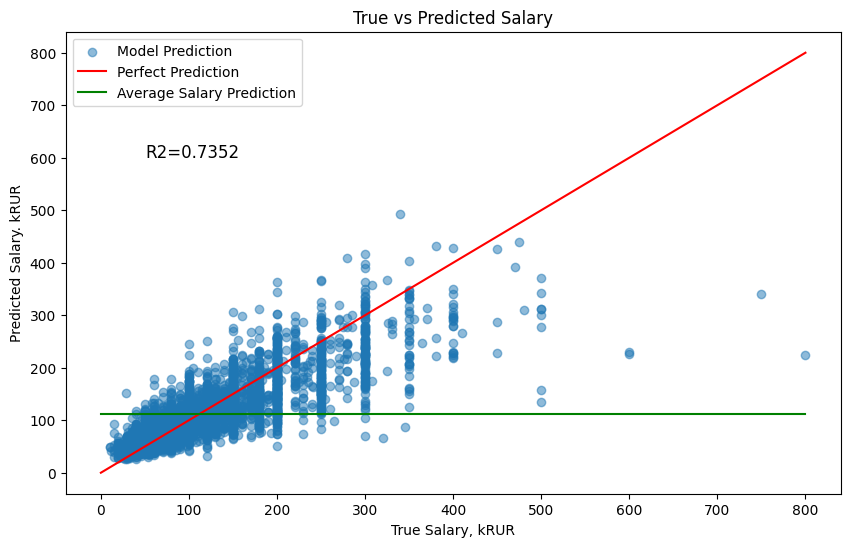

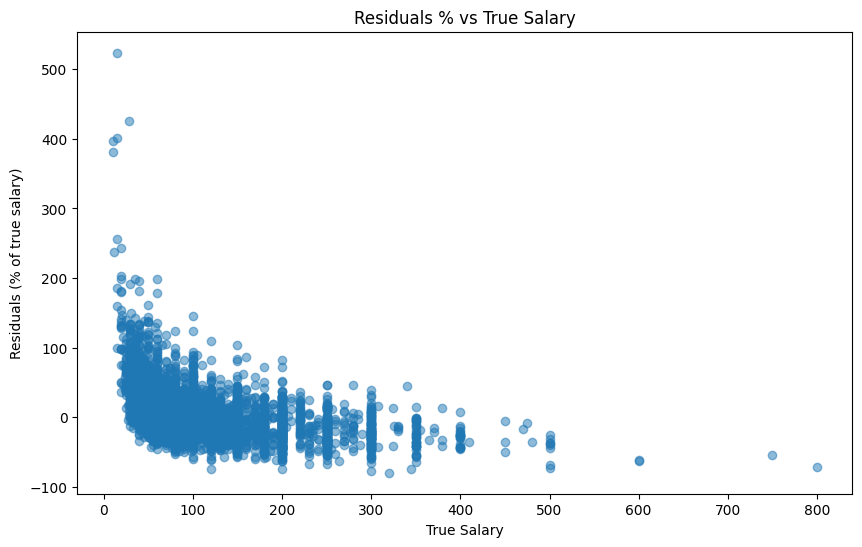

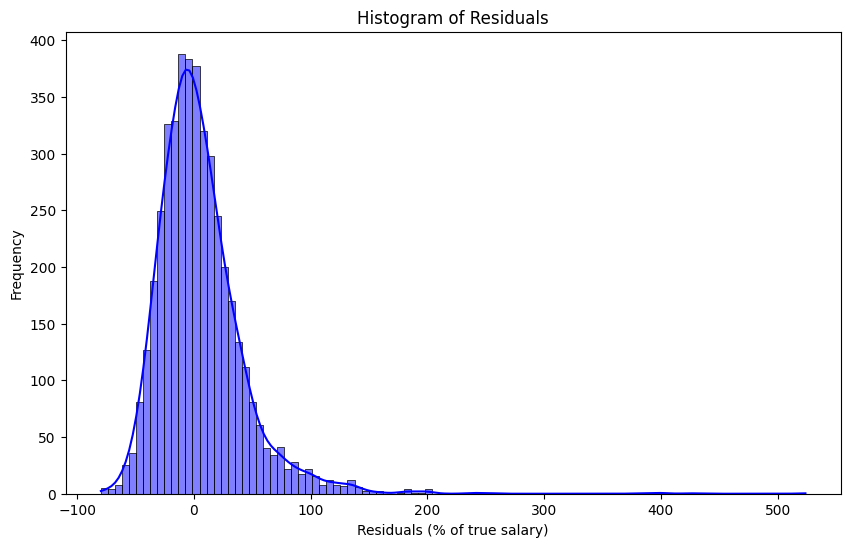

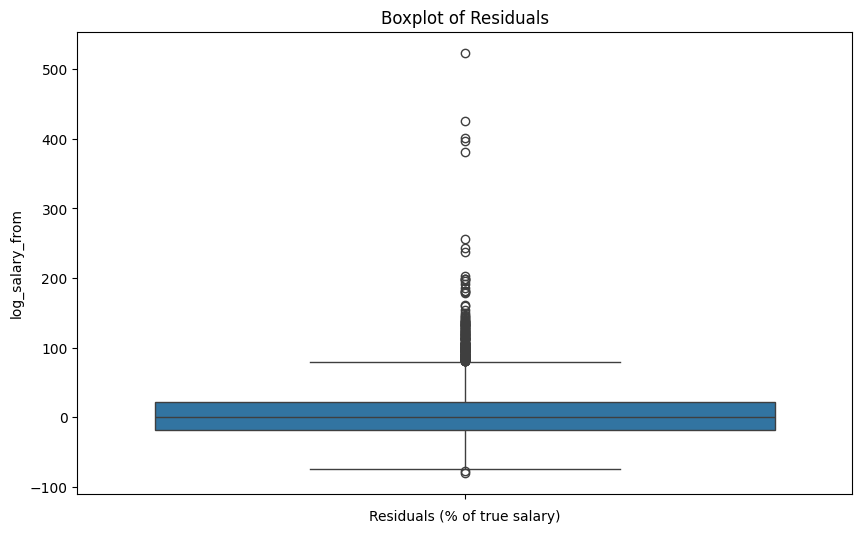

In [99]:
from sklearn.metrics import r2_score

y_pred = np.exp(model.predict(test_pool))
y_true = np.exp(y_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, label='Model Prediction')

# add line for perfect prediction
plt.plot([0, 800], [0, 800], color='red', label='Perfect Prediction')

# add line for average salary
plt.plot([0, 800], [y_true.mean(), y_true.mean()], color='green', label='Average Salary Prediction')

plt.xlabel('True Salary, kRUR')
plt.ylabel('Predicted Salary. kRUR')
plt.title('True vs Predicted Salary')
# add r2 score
# r2 = r2_score(y_true, y_pred)
r2 = r2_score(y_test, model.predict(test_pool))
plt.text(50, 600, f'R2={r2:.4f}', fontsize=12)
plt.legend()
plt.show()

# plot residuals vs true salary
# residuals should be % of true salary
plt.figure(figsize=(10, 6))
plt.scatter(y_true, (y_pred - y_true) / y_true * 100, alpha=0.5)
plt.xlabel('True Salary')
plt.ylabel('Residuals (% of true salary)')
plt.title('Residuals % vs True Salary')
plt.show()

# get histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot((y_pred - y_true) / y_true * 100, kde=True, color='blue', bins=100)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (% of true salary)')
plt.ylabel('Frequency')
plt.show()

# get boxplot of residuals
plt.figure(figsize=(10, 6))
sns.boxplot((y_pred - y_true) / y_true * 100)
plt.title('Boxplot of Residuals')
plt.xlabel('Residuals (% of true salary)')
plt.show()